Using Python Version 3.7.2


In [288]:
##Importing all the required Libraries
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
##Load and read the csv file before proceeding further 
data = pd.read_csv("loan.csv",error_bad_lines=False, index_col=False, dtype='unicode') 



In [172]:
##To Give The Info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [173]:
##Describes the data##
data.describe() 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,1062753,891328,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [174]:
##Shape of the data##
data.shape

(39717, 111)

## Data Cleaning starts ##

In [175]:
##checking the columns with null values ##
data.columns[data.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

In [176]:
##Getting Percentage count of missing values in each column ##
Columnsnullpercent_missing = data.isnull().sum() * 100 / len(data)
columnsmissingvaluedf = pd.DataFrame({'column_name': data.columns,
                                 'Columnsnullpercent_missing': Columnsnullpercent_missing})
columnsmissingvaluedf.sort_values('Columnsnullpercent_missing', inplace=True)
columnsmissingvaluedf

,column_name,Columnsnullpercent_missing
id,id,0.0
earliest_cr_line,earliest_cr_line,0.0
inq_last_6mths,inq_last_6mths,0.0
open_acc,open_acc,0.0
pub_rec,pub_rec,0.0
...,...,...
avg_cur_bal,avg_cur_bal,100.0
bc_open_to_buy,bc_open_to_buy,100.0
bc_util,bc_util,100.0
mo_sin_old_rev_tl_op,mo_sin_old_rev_tl_op,100.0


In [177]:
##Dropping the missing values columns which has percentage equal to 100.00 ##
dropmissing_values_columns = columnsmissingvaluedf[(columnsmissingvaluedf['Columnsnullpercent_missing'] == 100.00)].column_name.tolist()
data.drop(dropmissing_values_columns,axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [178]:
##Drop all the columns which has the values as nan ##
data.dropna(axis = 1, how = 'all', inplace = True)


In [179]:
##droping the columns that are referring to the current loan_status users and so dropping the columns and also assigning the remaining columns to new dataframe that are  required for the analysis##
updateddf=data.drop(['delinq_amnt', 'acc_now_delinq', 'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
  'installment',                                                         'tax_liens', 'collections_12_mths_ex_med',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'out_prncp',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d','id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d','desc','out_prncp_inv','total_acc'], axis=1)


In [180]:
##List of Columns that finally being used for the analysis##
updateddf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'recoveries', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

## Dictionary Explanation of Columns Finally going to Work With Case Study
1. loan_amnt->The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. funded_amnt->The total amount committed to that loan at that point in time.
3. funded_amnt_inv->The total amount committed by investors for that loan at that point in time.
4. term->The number of payments on the loan. Values are in months and can be either 36 or 60.
5. int_rate->Interest Rate on the loan
6. grade->LC assigned loan grade
7. sub_grade->LC assigned loan subgrade
8. emp_length->Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
9. home_ownership->The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
10. annual_inc->The self-reported annual income provided by the borrower during registration.
11. verification_status->Indicates if income was verified by LC, not verified, or if the income source was verified
12. issue_d->The month which the loan was funded
13. loan_status->Current status of the loan
14. purpose->A category provided by the borrower for the loan request. 
15. addr_state->The state provided by the borrower in the loan application
16. dti->A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
17. recoveries->post charge off gross recovery
18. application_type->Indicates whether the loan is an individual application or a joint application with two co-borrowers
19. pub_rec_bankruptcies->Number of public record bankruptcies

In [298]:
## Getting the information of the columns for the analysis##
updateddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38487 non-null  object  
 1   funded_amnt           39717 non-null  float64 
 2   funded_amnt_inv       39717 non-null  float64 
 3   term                  39717 non-null  object  
 4   int_rate              38435 non-null  object  
 5   grade                 39717 non-null  object  
 6   sub_grade             39717 non-null  int64   
 7   emp_length            39717 non-null  int64   
 8   home_ownership        39717 non-null  int64   
 9   annual_inc            37874 non-null  object  
 10  verification_status   39717 non-null  object  
 11  issue_d               39717 non-null  object  
 12  loan_status           39717 non-null  object  
 13  purpose               39717 non-null  object  
 14  addr_state            39717 non-null  object  
 15  dt

In [182]:
##Cleaning,Analysis emp_length columns with their frequency count  ##
maxemp_length=updateddf.emp_length.value_counts().idxmax()
print(maxemp_length)
updateddf.emp_length.value_counts()

10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [183]:
##Getting the count  of nan values in emp_length ##
updateddf.emp_length.isna().sum()

1075

In [184]:
##Since it is a Categorical column##
##Doing mode operation and replacing the mode value with nan values is a efficient approach##
##So to a mode value and replaced nan values with highes mode##
updateddf.emp_length.fillna(updateddf.emp_length.mode()[0], inplace = True)
##Just for validation checked again if any nan values still but as we replaced nan values with mode now the count of nan values  will be 0##
updateddf.emp_length.isna().sum()

0

In [185]:
##Cleaning up the emp_length column by removing < and + symbols##
updateddf.emp_length = pd.to_numeric(updateddf.emp_length.apply(lambda emp: 0 if "<" in emp  else (emp.split('+')[0] if "+" in emp else emp.split(" ")[0])))
updateddf.emp_length 

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: int64

In [186]:
##checking if the int_rate column has any nan values##
updateddf.int_rate.isna().sum()

0

In [187]:
##cleaning up the int_rate column by removing the %##
updateddf.int_rate= pd.to_numeric(updateddf.int_rate.apply(lambda x : str(x).split("%")[0]))

updateddf.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [188]:
##Applying describe  function on dti column##
updateddf['dti'].describe()

count     39717
unique     2868
top           0
freq        183
Name: dti, dtype: object

In [189]:
## Since it has dtype object for the analysis converting to float and again did the describe##
updateddf['dti']=updateddf['dti'].astype('float')
updateddf['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [190]:
##As subgrade is a categorical variable converted to  the respective number for the further analysis##
updateddf.sub_grade= pd.to_numeric(updateddf.sub_grade.apply(lambda x : str(x)[1]))
updateddf.sub_grade.head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: int64

In [191]:
##Cleaning the issue_d column and creating two columns in existing dataframe with name month and year for further analysis##
m= pd.to_datetime(updateddf['issue_d'],format='%b-%y')
updateddf['month']=m.dt.month
updateddf['year']=m.dt.year
print(updateddf['month'])
print(updateddf['year'])

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 39717, dtype: int64
0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 39717, dtype: int64


In [192]:
##To get the count of years as it is a categorical variable##
updateddf['year'].value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

In [193]:
##To get the count of month as it is a categorical variable##
updateddf['month'].value_counts()

12    4433
11    4167
10    3934
9     3648
8     3518
7     3476
6     3279
5     2999
4     2834
3     2692
1     2379
2     2358
Name: month, dtype: int64

In [194]:
##These are the columns in numbers but their dtype is object##
print("loan_amnt"+"->"+str(updateddf['loan_amnt'].dtype))
print("annual_inc"+"->"+str(updateddf['annual_inc'].dtype))
print("pub_rec_bankruptcies"+"->"+str(updateddf['pub_rec_bankruptcies'].dtype))
print("recoveries"+"->"+str(updateddf['recoveries'].dtype))
print("funded_amnt"+"->"+str(updateddf['funded_amnt'].dtype))
print("funded_amnt_inv"+"->"+str(updateddf['funded_amnt_inv'].dtype))

loan_amnt->object
annual_inc->object
pub_rec_bankruptcies->object
recoveries->object
funded_amnt->object
funded_amnt_inv->object


In [195]:
##So these columns are required to get converted to float type for further analysis##
## Added a custom function if any type is object and need to be converted to float this method can be used##
def floatconversion(x):
    return x.astype('float64')
    
updateddf['loan_amnt']=floatconversion(updateddf['loan_amnt'])
updateddf['annual_inc']=floatconversion(updateddf['annual_inc'])
updateddf['pub_rec_bankruptcies']=floatconversion(updateddf['pub_rec_bankruptcies'])
updateddf['recoveries']=floatconversion(updateddf['recoveries'])
updateddf['funded_amnt']=floatconversion(updateddf['funded_amnt'])
updateddf['funded_amnt_inv']=floatconversion(updateddf['funded_amnt_inv'])

In [196]:
updateddf['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [197]:
##Custom Function For calculating outliers##
def iqrCalculation(df,column):
    iqr25=df[column].quantile(0.25)
    iqr75=df[column].quantile(0.75)
    # calculate the IQR
    iqr =  iqr75 - iqr25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = iqr25 - cut_off,  iqr75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    df[column]= df[df[column] < upper]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])




count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


[Text(0, 0.5, 'annual_inc')]

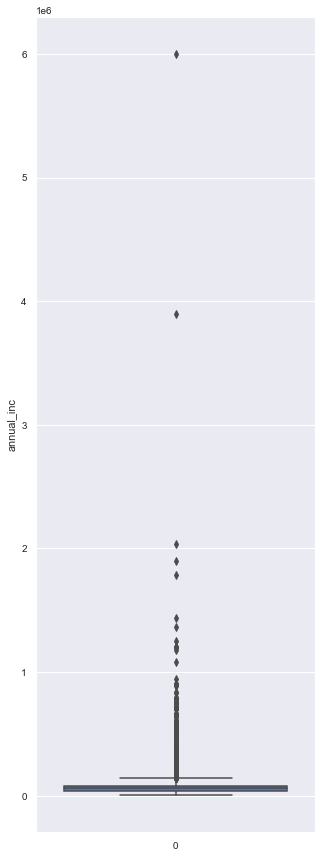

In [198]:
## Before Removing the outliers of annual_inc column##
plt.figure(figsize=(5,15))
print(updateddf['annual_inc'].describe())
sns.boxplot(data=updateddf['annual_inc']).set(
    ylabel='annual_inc'
)

The IQR is 41896.0
The lower bound value is -22440.0
The upper bound value is 145144.0
Total number of outliers are 1843
count     37874.0
unique      868.0
top       10000.0
freq       2720.0
Name: annual_inc, dtype: float64


[Text(0, 0.5, 'annual_inc')]

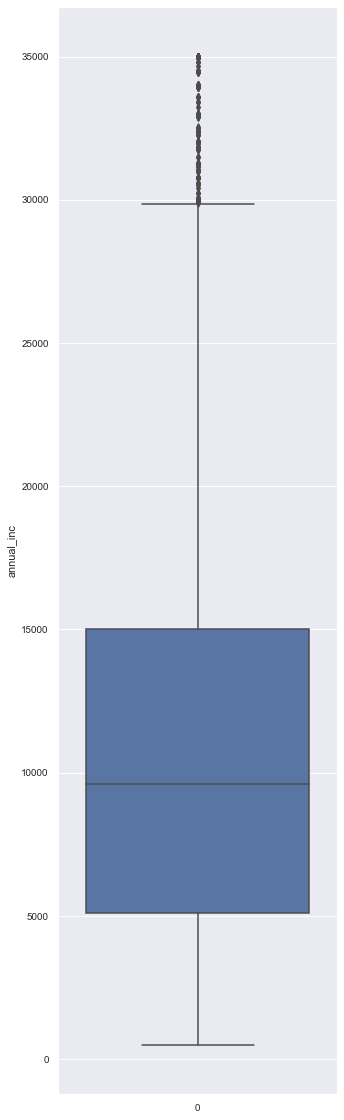

In [199]:
## After Removing the outliers of annual_inc column##
plt.figure(figsize=(5,20))
iqrCalculation(updateddf,'annual_inc')
print(updateddf['annual_inc'].describe())   
sns.boxplot(data=updateddf['annual_inc']).set(
    ylabel='annual_inc'
)

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


[Text(0, 0.5, 'loan_amnt')]

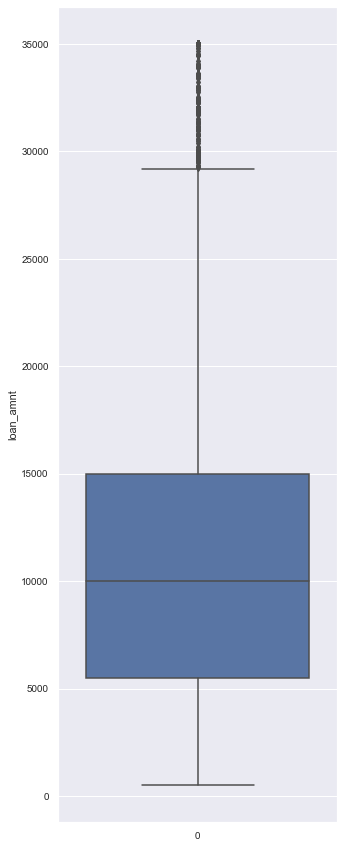

In [200]:
## Before Removing the outliers of annual_inc column##
plt.figure(figsize=(5,15))
print(updateddf['loan_amnt'].describe()) 
sns.boxplot(data=updateddf['loan_amnt']).set(
    ylabel='loan_amnt'
)

The IQR is 9500.0
The lower bound value is -8750.0
The upper bound value is 29250.0
Total number of outliers are 1230
count     38487.0
unique      832.0
top       10000.0
freq       2833.0
Name: loan_amnt, dtype: float64


[Text(0, 0.5, 'loan_amnt')]

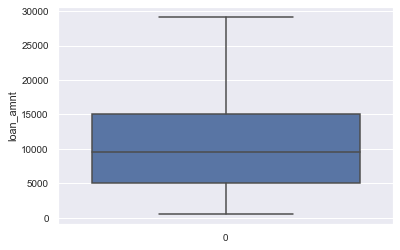

In [201]:
## After Removing the outliers of annual_inc column##
iqrCalculation(updateddf,'loan_amnt')
print(updateddf['loan_amnt'].describe())     
sns.boxplot(data=updateddf['loan_amnt']).set(
    ylabel='loan_amnt'
)

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


[Text(0, 0.5, 'int_rate')]

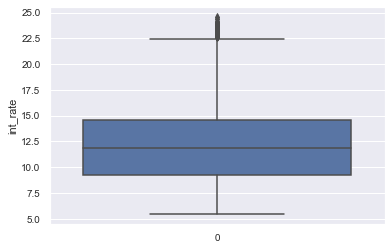

In [202]:
## Before Removing the outliers of annual_inc column##
print(updateddf['int_rate'].describe()) 
sns.boxplot(data=updateddf['int_rate']).set(
    ylabel='int_rate'
)

The IQR is 5.34
The lower bound value is 1.2400000000000002
The upper bound value is 22.6
Total number of outliers are 78
count     38435.0
unique      828.0
top       10000.0
freq       2832.0
Name: int_rate, dtype: float64


[Text(0, 0.5, 'int_rate')]

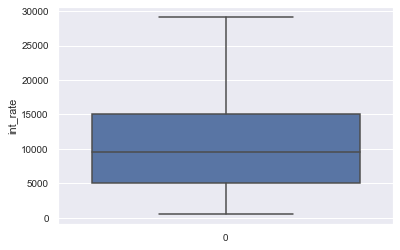

In [203]:
## After Removing the outliers of annual_inc column##
iqrCalculation(updateddf,'int_rate')
print(updateddf['int_rate'].describe())     
sns.boxplot(data=updateddf['int_rate']).set(
    ylabel='int_rate'
)

## Univarate Analysis ##



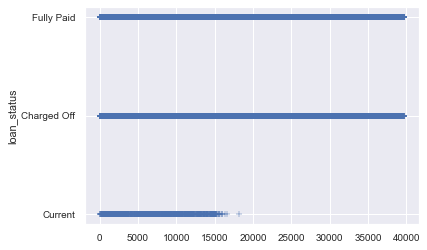

In [204]:
##Analysis of loan_status column##
sns.scatterplot(data=updateddf['loan_status'],marker='+');
##Analysis from Plot
#The loan_status column has fullypaid,chargedoff,current

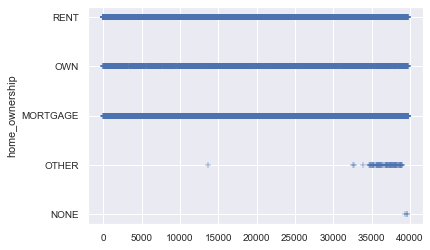

In [205]:
##Analysis of home_ownership column##
sns.scatterplot(data=updateddf['home_ownership'],marker='+');

##Analysis from Plot
#The homeownership column has rent,own,mortgage,other,none
#From the analysis rent,own,mortgage has equal count

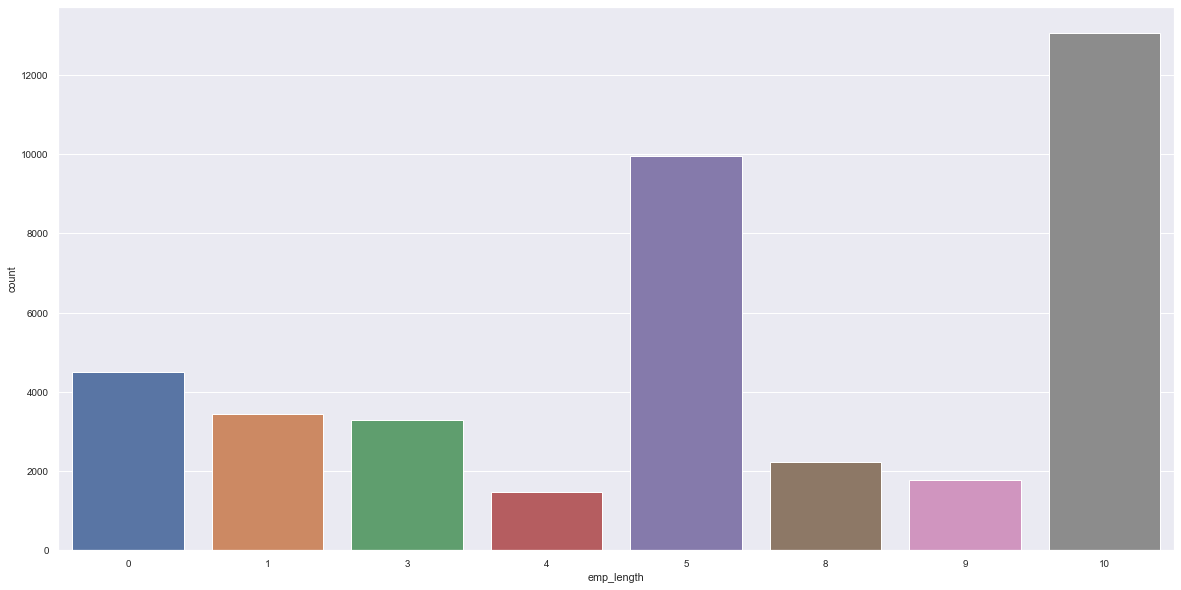

In [206]:
##Analysis of emp_length column##'
plt.figure(figsize=(20,10))
sns.countplot(data=updateddf['emp_length'],x=updateddf['emp_length']);

##Analysis from Plot
#There emp_length column describes employment length in years so from the plot the employment tenure ranges from 0 to 10+years.
#count of employment years for 10 and above is more

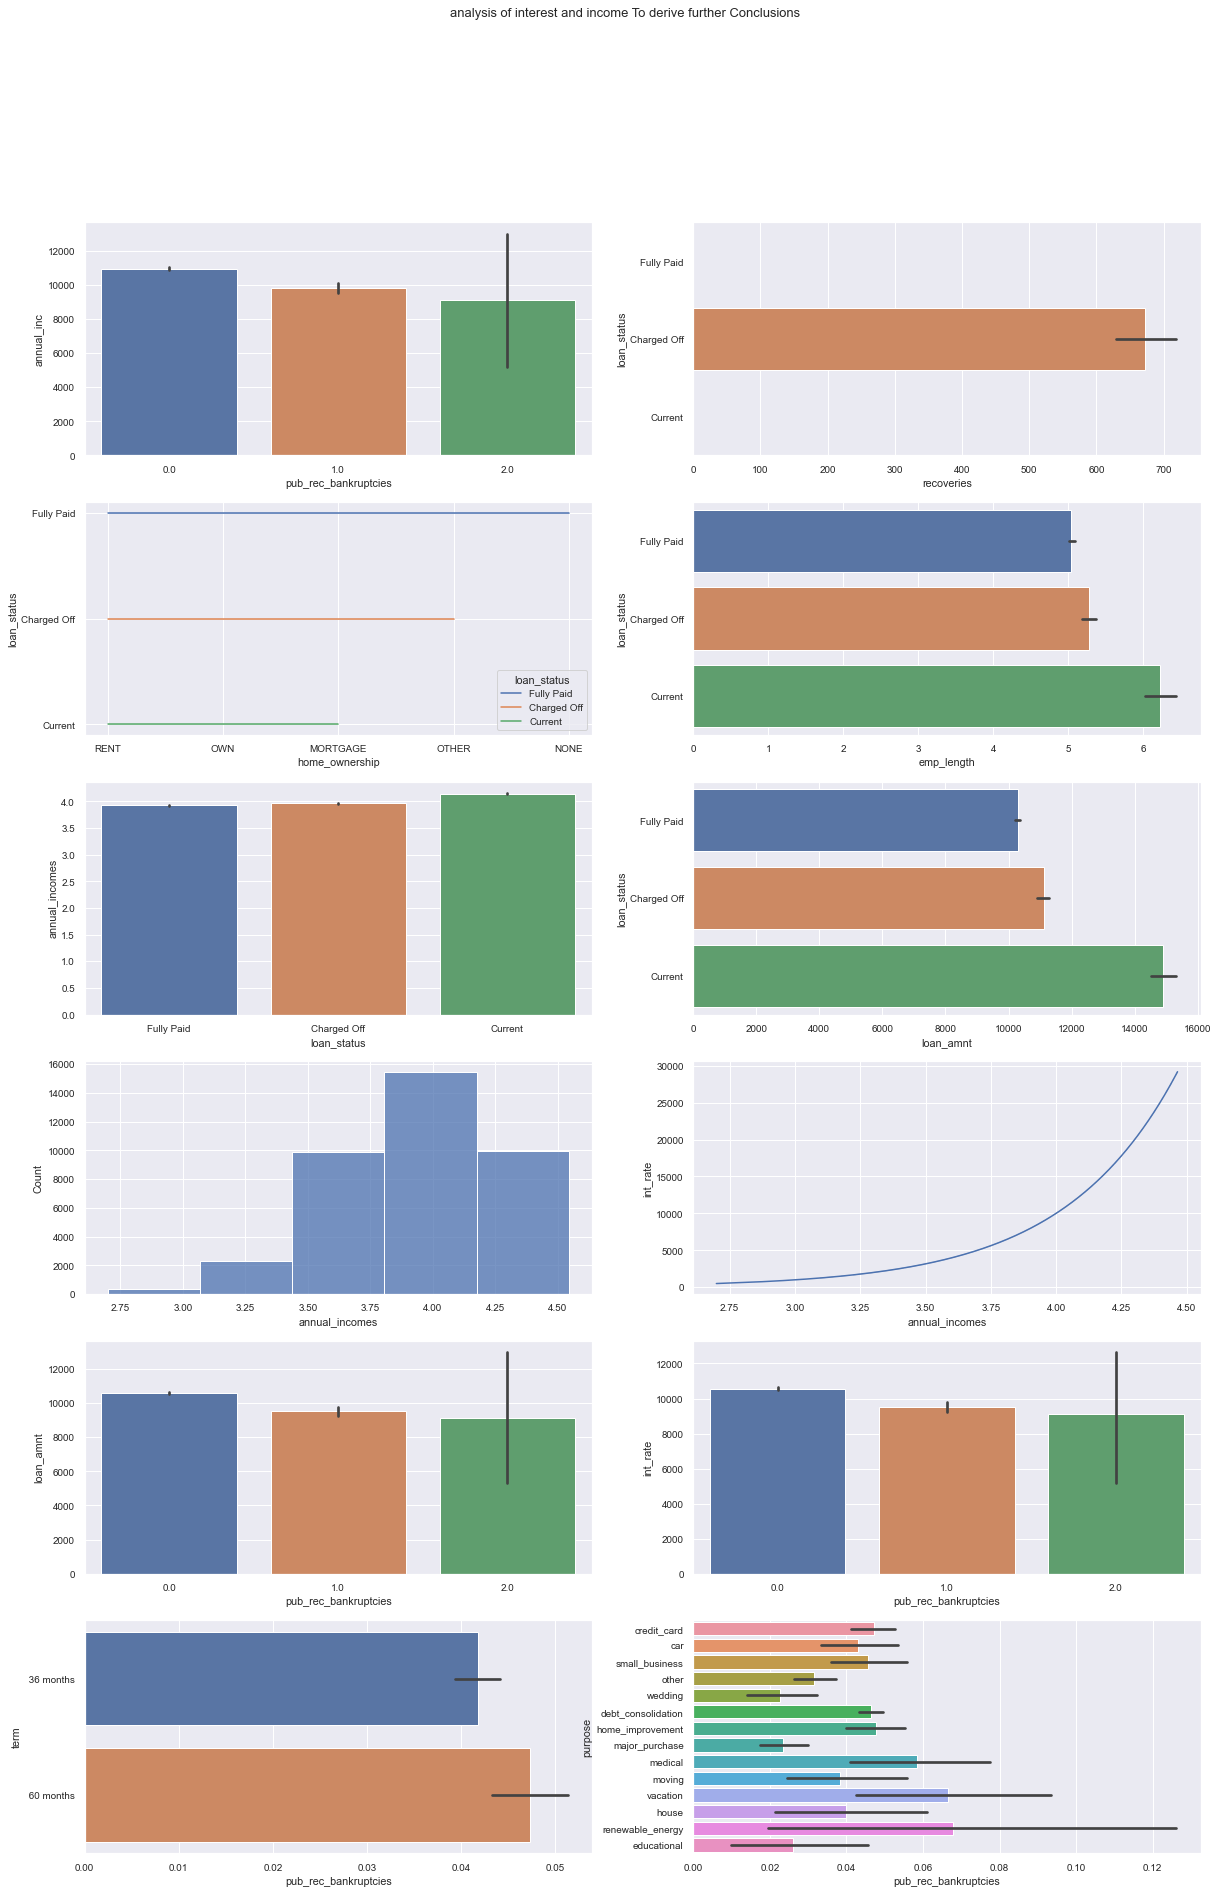

In [207]:
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
fig.suptitle('analysis of interest and income To derive further Conclusions')
 
updateddf['annual_incomes'] = np.log10(updateddf['annual_inc'].astype('float'));
sns.set(font_scale = 0.9)
sns.barplot(ax=axes[0, 0], data=updateddf, x=updateddf['pub_rec_bankruptcies'], y=updateddf['annual_inc']);
sns.barplot(ax=axes[0, 1], data=updateddf, x=updateddf['recoveries'], y=updateddf['loan_status']);
sns.lineplot(ax=axes[1,0], data=updateddf, x=updateddf['home_ownership'], y=updateddf['loan_status'], hue=updateddf['loan_status']);
sns.barplot(ax=axes[1, 1], data=updateddf, x=updateddf['emp_length'], y=updateddf['loan_status']);
sns.barplot(ax=axes[2, 0], data=updateddf, y=updateddf['annual_incomes'], x=updateddf['loan_status']);

sns.barplot(ax=axes[2, 1], data=updateddf, x=updateddf['loan_amnt'], y=updateddf['loan_status']);
sns.histplot(ax=axes[3,0],x=updateddf['annual_incomes'], bins=5);
sns.lineplot(ax=axes[3,1], data=updateddf, x=updateddf['annual_incomes'].astype('float'), y=updateddf['int_rate'].astype('float'));
sns.barplot(ax=axes[4, 0], data=updateddf, x=updateddf['pub_rec_bankruptcies'], y=updateddf['loan_amnt']);
sns.barplot(ax=axes[4, 1], data=updateddf, x=updateddf['pub_rec_bankruptcies'], y=updateddf['int_rate']);
sns.barplot(ax=axes[5, 0], data=updateddf, x=updateddf['pub_rec_bankruptcies'], y=updateddf['term']);
sns.barplot(ax=axes[5, 1], data=updateddf, x=updateddf['pub_rec_bankruptcies'], y=updateddf['purpose']);


#From the analysis with the higher term the bankruptcies are more possible 
# with the increase in income interest rate also increasing so if the term is high for repaying their is possibility of bankruptcies and chargeoff.


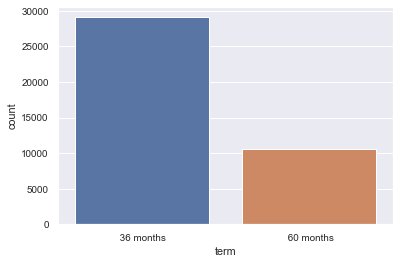

In [208]:
##Analysis of term column##
sns.countplot(data=updateddf['term'],x=updateddf['term']);

##Analysis from Plot
#There  are two terms i.e 36 months and 60 months
#36months have more count

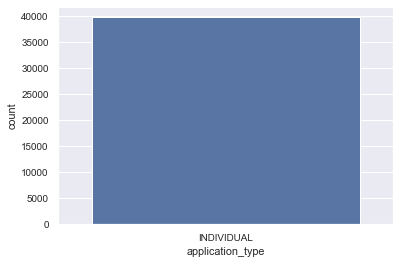

In [209]:
##Analysis of application_type column##
sns.countplot(data=updateddf['application_type'],x=updateddf['application_type']);

##Analysis from Plot
#There  is only one application type i.e Indivual

## Bivarate Analysis

In [210]:
##Since annual_inc is categorical we can divide it into bins for further analysis##
##Created a new column in existing dataframe which contains the bins of annual income##
updateddf['annual_incomes'] = pd.qcut(updateddf['annual_inc'],10)
updateddf['annual_incomes']

0         (3000.0, 5000.0]
1        (499.999, 3000.0]
2        (499.999, 3000.0]
3        (9600.0, 11000.0]
4        (499.999, 3000.0]
               ...        
39712    (499.999, 3000.0]
39713     (7500.0, 9600.0]
39714     (3000.0, 5000.0]
39715                  NaN
39716    (499.999, 3000.0]
Name: annual_incomes, Length: 39717, dtype: category
Categories (10, interval[float64]): [(499.999, 3000.0] < (3000.0, 5000.0] < (5000.0, 6000.0] < (6000.0, 7500.0] ... (11000.0, 13225.0] < (13225.0, 16000.0] < (16000.0, 20500.0] < (20500.0, 35000.0]]

In [211]:
##Since dti is categorical we can divide it into bins for further analysis##
##Created a new column in existing dataframe which contains the bins of dti##
updateddf['dti_cats']= pd.qcut(updateddf['dti'],4)
updateddf['dti_cats']

0         (18.6, 29.99]
1        (-0.001, 8.17]
2          (8.17, 13.4]
3         (18.6, 29.99]
4          (13.4, 18.6]
              ...      
39712      (8.17, 13.4]
39713    (-0.001, 8.17]
39714    (-0.001, 8.17]
39715    (-0.001, 8.17]
39716      (13.4, 18.6]
Name: dti_cats, Length: 39717, dtype: category
Categories (4, interval[float64]): [(-0.001, 8.17] < (8.17, 13.4] < (13.4, 18.6] < (18.6, 29.99]]

In [212]:
#Analysing chargedoff loan_status  
#This is done by :
#1.doing groupby of annualincomes column and loanstatus column
#2.Then considered only chargedoff and fullypaid as considering current will not add much insight to the analysis.
#3.created a new column in existing dataframe for storing this ratios
incrangevsloan = updateddf.groupby(['annual_incomes', 'loan_status']).loan_status.count().unstack().fillna(0)
incrangevsloan['finalTotal'] =incrangevsloan['Charged Off'] + incrangevsloan['Fully Paid'] 
updateddf['ChargedoffProportion'] =incrangevsloan['Charged Off'] /incrangevsloan['finalTotal']
updateddf.sort_values('ChargedoffProportion', ascending=False)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,recoveries,application_type,pub_rec_bankruptcies,month,year,annual_incomes,dti_cats,ChargedoffProportion
35000,15000.0,15000.0,14900.0,36 months,15000.0,C,2,2,RENT,15000.0,...,VA,1.96,0.00,INDIVIDUAL,0.0,10,2009,"(13225.0, 16000.0]","(-0.001, 8.17]",0.212395
25314,19600.0,19600.0,19400.0,36 months,19600.0,A,5,7,MORTGAGE,19600.0,...,CT,18.30,0.00,INDIVIDUAL,0.0,9,2010,"(16000.0, 20500.0]","(13.4, 18.6]",0.212395
25340,8000.0,8000.0,8000.0,36 months,8000.0,A,3,4,RENT,8000.0,...,CA,8.26,0.00,INDIVIDUAL,0.0,9,2010,"(7500.0, 9600.0]","(8.17, 13.4]",0.212395
25339,2000.0,2000.0,2000.0,36 months,2000.0,C,2,4,RENT,2000.0,...,FL,12.00,40.95,INDIVIDUAL,0.0,9,2010,"(499.999, 3000.0]","(8.17, 13.4]",0.212395
25338,5000.0,5000.0,5000.0,36 months,5000.0,A,4,1,RENT,5000.0,...,IL,7.12,0.00,INDIVIDUAL,0.0,9,2010,"(3000.0, 5000.0]","(-0.001, 8.17]",0.212395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36 months,2500.0,A,4,4,MORTGAGE,2500.0,...,CO,11.33,0.00,INDIVIDUAL,NaN,7,2007,"(499.999, 3000.0]","(8.17, 13.4]",NaN
39713,8500.0,8500.0,875.0,36 months,8500.0,C,1,3,RENT,8500.0,...,NC,6.40,0.00,INDIVIDUAL,NaN,7,2007,"(7500.0, 9600.0]","(-0.001, 8.17]",NaN
39714,5000.0,5000.0,1325.0,36 months,5000.0,A,4,0,MORTGAGE,5000.0,...,MA,2.30,0.00,INDIVIDUAL,NaN,7,2007,"(3000.0, 5000.0]","(-0.001, 8.17]",NaN
39715,5000.0,5000.0,650.0,36 months,5000.0,A,2,0,MORTGAGE,NaN,...,MD,3.72,0.00,INDIVIDUAL,NaN,7,2007,NaN,"(-0.001, 8.17]",NaN


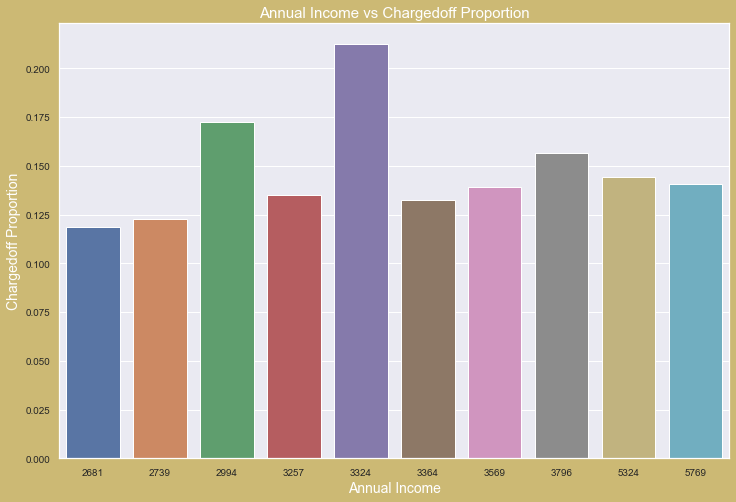

In [213]:
#Plotted the graph between the chargedoffProportion and finaltotal(considered only chargedoff and finaltotal)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x=incrangevsloan['finalTotal'], y=updateddf['ChargedoffProportion'], data=incrangevsloan )
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()
##Analysis
#charged off is higher for annual income 3324 

In [214]:
#Analysing Fullypaid loan_status 
#This is done by :
#1.doing groupby of annualincomes column  and loanstatuscolumn
#2.Then considered only chargedoff and fullypaid as considering current will not add much insight to the analysis.
#3.created a new column in existing dataframe for storing this ratios
incrangesvsFullyPaid = updateddf.groupby(['annual_incomes', 'loan_status']).loan_status.count().unstack().fillna(0)
incrangesvsFullyPaid['finalTotal'] =incrangevsloan['Charged Off'] + incrangevsloan['Fully Paid'] 
updateddf['FullyPaidProportion'] =incrangevsloan['Fully Paid'] /incrangevsloan['finalTotal']
updateddf.sort_values('ChargedoffProportion', ascending=False)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,recoveries,application_type,pub_rec_bankruptcies,month,year,annual_incomes,dti_cats,ChargedoffProportion,FullyPaidProportion
35000,15000.0,15000.0,14900.0,36 months,15000.0,C,2,2,RENT,15000.0,...,1.96,0.00,INDIVIDUAL,0.0,10,2009,"(13225.0, 16000.0]","(-0.001, 8.17]",0.212395,0.787605
25314,19600.0,19600.0,19400.0,36 months,19600.0,A,5,7,MORTGAGE,19600.0,...,18.30,0.00,INDIVIDUAL,0.0,9,2010,"(16000.0, 20500.0]","(13.4, 18.6]",0.212395,0.787605
25340,8000.0,8000.0,8000.0,36 months,8000.0,A,3,4,RENT,8000.0,...,8.26,0.00,INDIVIDUAL,0.0,9,2010,"(7500.0, 9600.0]","(8.17, 13.4]",0.212395,0.787605
25339,2000.0,2000.0,2000.0,36 months,2000.0,C,2,4,RENT,2000.0,...,12.00,40.95,INDIVIDUAL,0.0,9,2010,"(499.999, 3000.0]","(8.17, 13.4]",0.212395,0.787605
25338,5000.0,5000.0,5000.0,36 months,5000.0,A,4,1,RENT,5000.0,...,7.12,0.00,INDIVIDUAL,0.0,9,2010,"(3000.0, 5000.0]","(-0.001, 8.17]",0.212395,0.787605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36 months,2500.0,A,4,4,MORTGAGE,2500.0,...,11.33,0.00,INDIVIDUAL,NaN,7,2007,"(499.999, 3000.0]","(8.17, 13.4]",NaN,NaN
39713,8500.0,8500.0,875.0,36 months,8500.0,C,1,3,RENT,8500.0,...,6.40,0.00,INDIVIDUAL,NaN,7,2007,"(7500.0, 9600.0]","(-0.001, 8.17]",NaN,NaN
39714,5000.0,5000.0,1325.0,36 months,5000.0,A,4,0,MORTGAGE,5000.0,...,2.30,0.00,INDIVIDUAL,NaN,7,2007,"(3000.0, 5000.0]","(-0.001, 8.17]",NaN,NaN
39715,5000.0,5000.0,650.0,36 months,5000.0,A,2,0,MORTGAGE,NaN,...,3.72,0.00,INDIVIDUAL,NaN,7,2007,NaN,"(-0.001, 8.17]",NaN,NaN


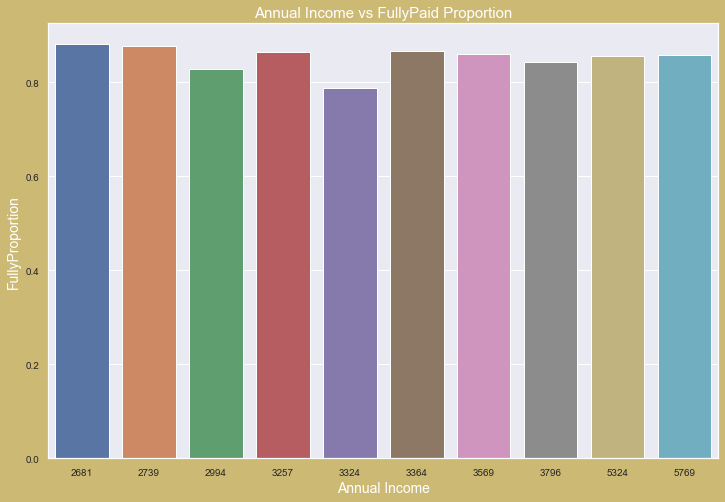

In [215]:
#Plotted the graph between the FullyPaidProportion and finaltotal(considered only chargedoff and finaltotal)
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Annual Income vs FullyPaid Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x=incrangevsloan['finalTotal'], y=updateddf['FullyPaidProportion'], data=incrangesvsFullyPaid )
ax1.set_ylabel('FullyProportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()
##Analysis
#FullyPaid is happened and  is higher for annual income 3324 and 3257

In [216]:
##Since the home_ownership is categorical for further analysis converting the values in home_ownership column to a dummy variables ##
updateddf['home_ownership']=updateddf['home_ownership'].apply(lambda x:1 if x in 'RENT' else(2 if x in 'OWN' else(3 if x in 'MORTGAGE' else(4 if x in 'OTHER' else(5 if x in 'NONE' else 0 )) )))

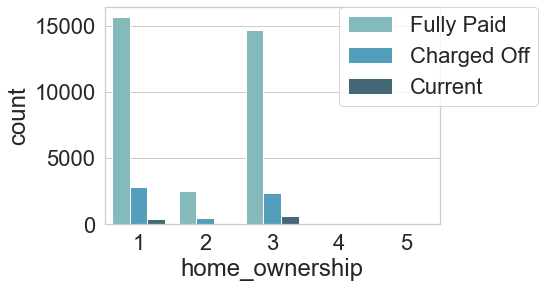

In [253]:
##Plotted a graph between home_ownership and loan_status##
sns.countplot(x=updateddf['home_ownership'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
plt.legend(bbox_to_anchor=(0.7, 1), loc=2, borderaxespad=0.);
#From the analysis the number 1 i.e rent has more charged off

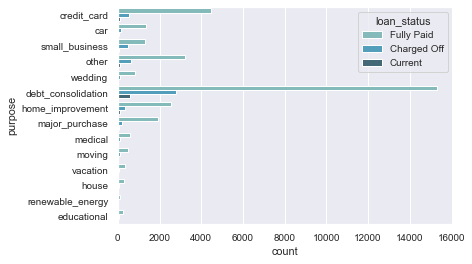

In [218]:
##Plotted a graph between purpose and loan_status##
sns.countplot(y=updateddf['purpose'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis the debt consolidation has highest charged off

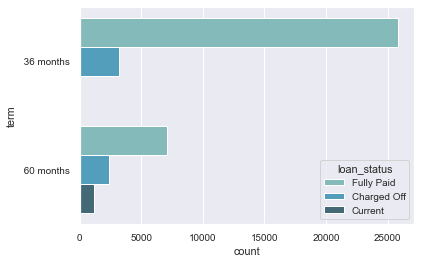

In [219]:
##Plotted a graph between term and loan_status##
sns.countplot(y=updateddf['term'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis the term with 36months has highest charged off

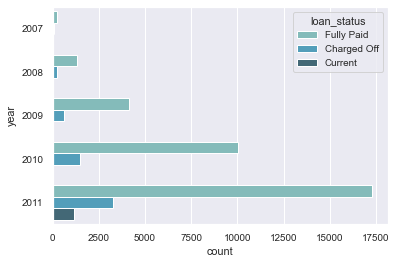

In [220]:
##Plotted a graph between year and loan_status##
sns.countplot(y=updateddf['year'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis the year with 2011 has highest charged off

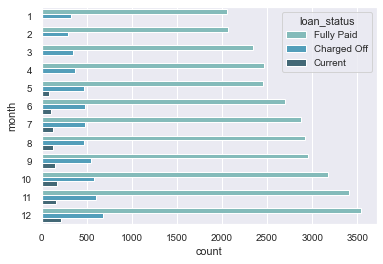

In [221]:
##Plotted a graph between month and loan_status##
sns.countplot(y=updateddf['month'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis the month with december has highest charged off

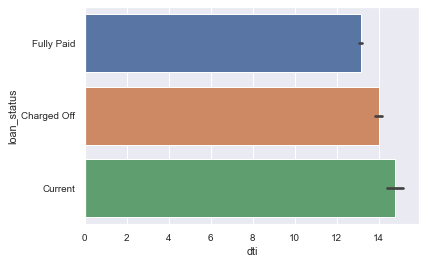

In [222]:
##Plotted a graph between dti and loan_status##
sns.barplot(x=updateddf['dti'], y=updateddf['loan_status'], data=updateddf['dti'] );
#From the analysis -
#dti is A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
#ignoring the current loan_status  as it doesnot contribute to case study .
#From comparison between Fullypaid and chargedoff , chargedoff has highest dti ratio

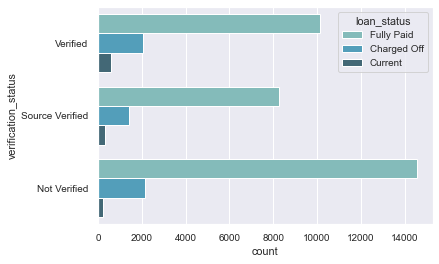

In [223]:
##Plotted a graph between verification_status and loan_status##
sns.countplot(y=updateddf['verification_status'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis -
#both verified and not verified are equal for chargeoff and sourceverified is less than both verified and not verified for chargedoff

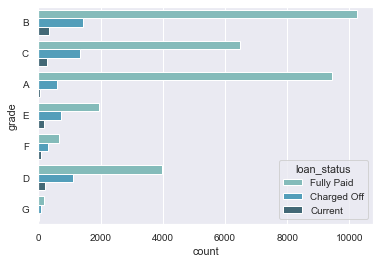

In [224]:
##Plotted a graph between grade and loan_status##
sns.countplot(y=updateddf['grade'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#From the analysis grade c has high chargedoff

In [225]:
#converted loan_status column to respective dummy variable for further analysis as it is a categorical column
updateddf['loan_status_num']= pd.to_numeric(updateddf['loan_status'].apply(lambda x:1 if x in 'Fully Paid' else(0 if x in 'Charged Off' else 2 )))
updateddf['loan_status_num']

0        1
1        0
2        1
3        1
4        2
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Name: loan_status_num, Length: 39717, dtype: int64

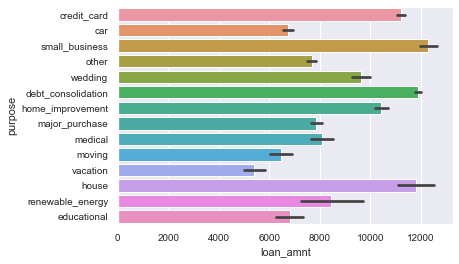

In [226]:
##Plotted a graph between loan_amnt and purpose##
sns.barplot(x=updateddf['loan_amnt'], y=updateddf['purpose'], data=updateddf['loan_amnt'] );
#From the analysis -
#car purpose,renewable energy  has high loan amount


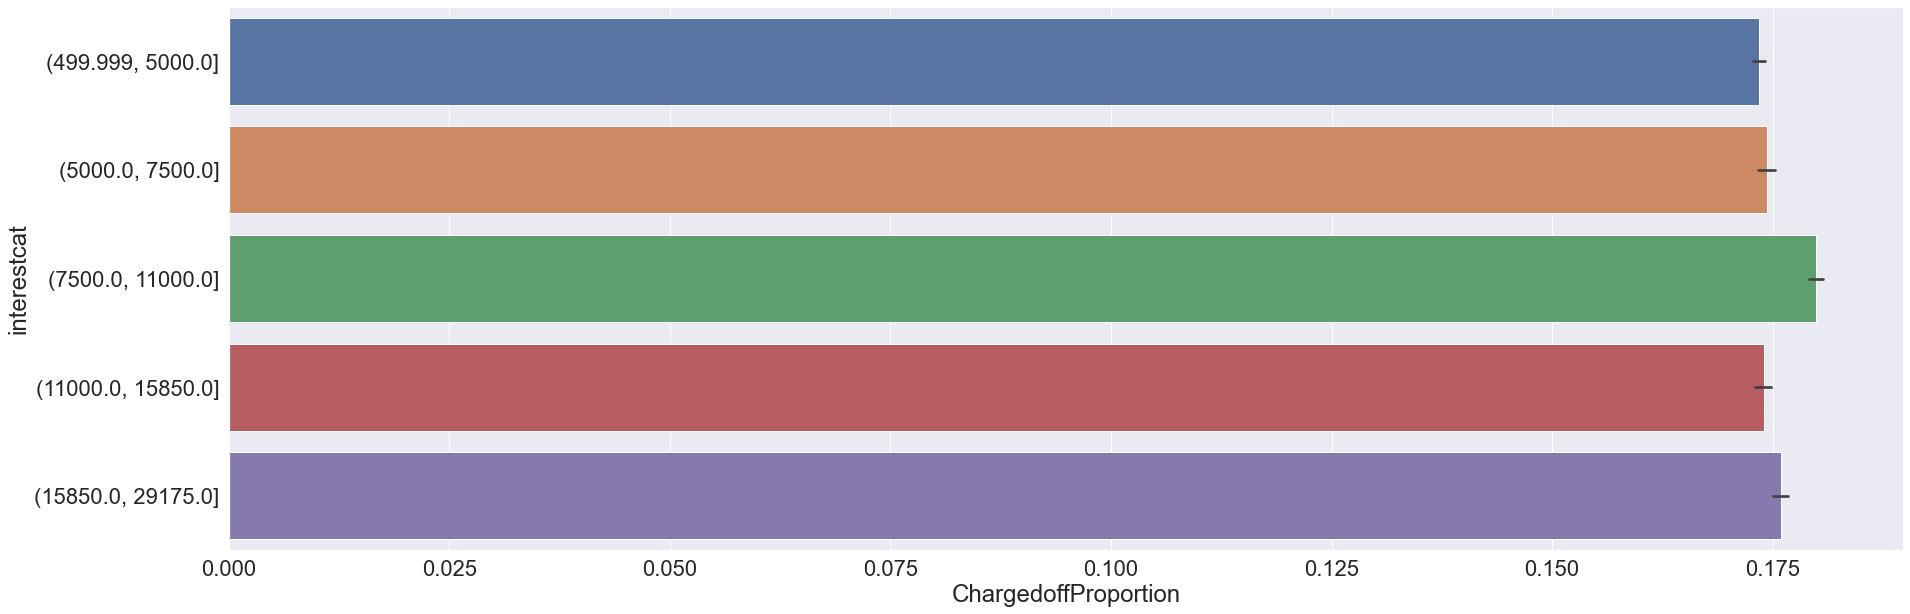

In [227]:
##Plotted a graph between interest rate and 'ChargedoffProportion'##
updateddf['interestcat']=pd.qcut(updateddf['int_rate'],5)
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['ChargedoffProportion'], y=updateddf['interestcat'], data=updateddf['int_rate'] );
#From the analysis -
#interest rate between 7.5 and 11 has chargedoff



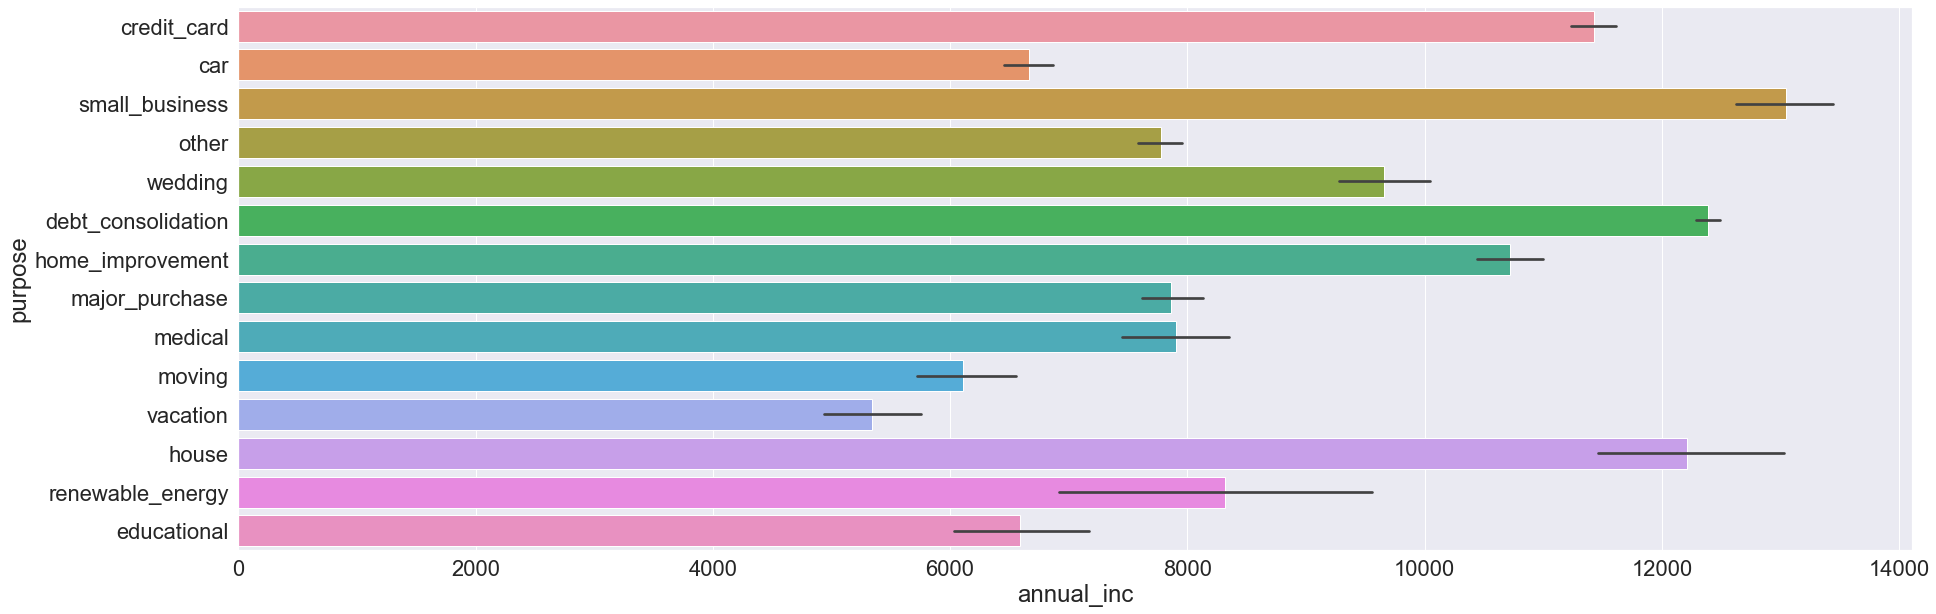

In [228]:
##Plotted a graph between 'annual_inc' and 'purpose'##
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['annual_inc'], y=updateddf['purpose'], data=updateddf['annual_inc'] );
#From the analysis -
#small business has high income



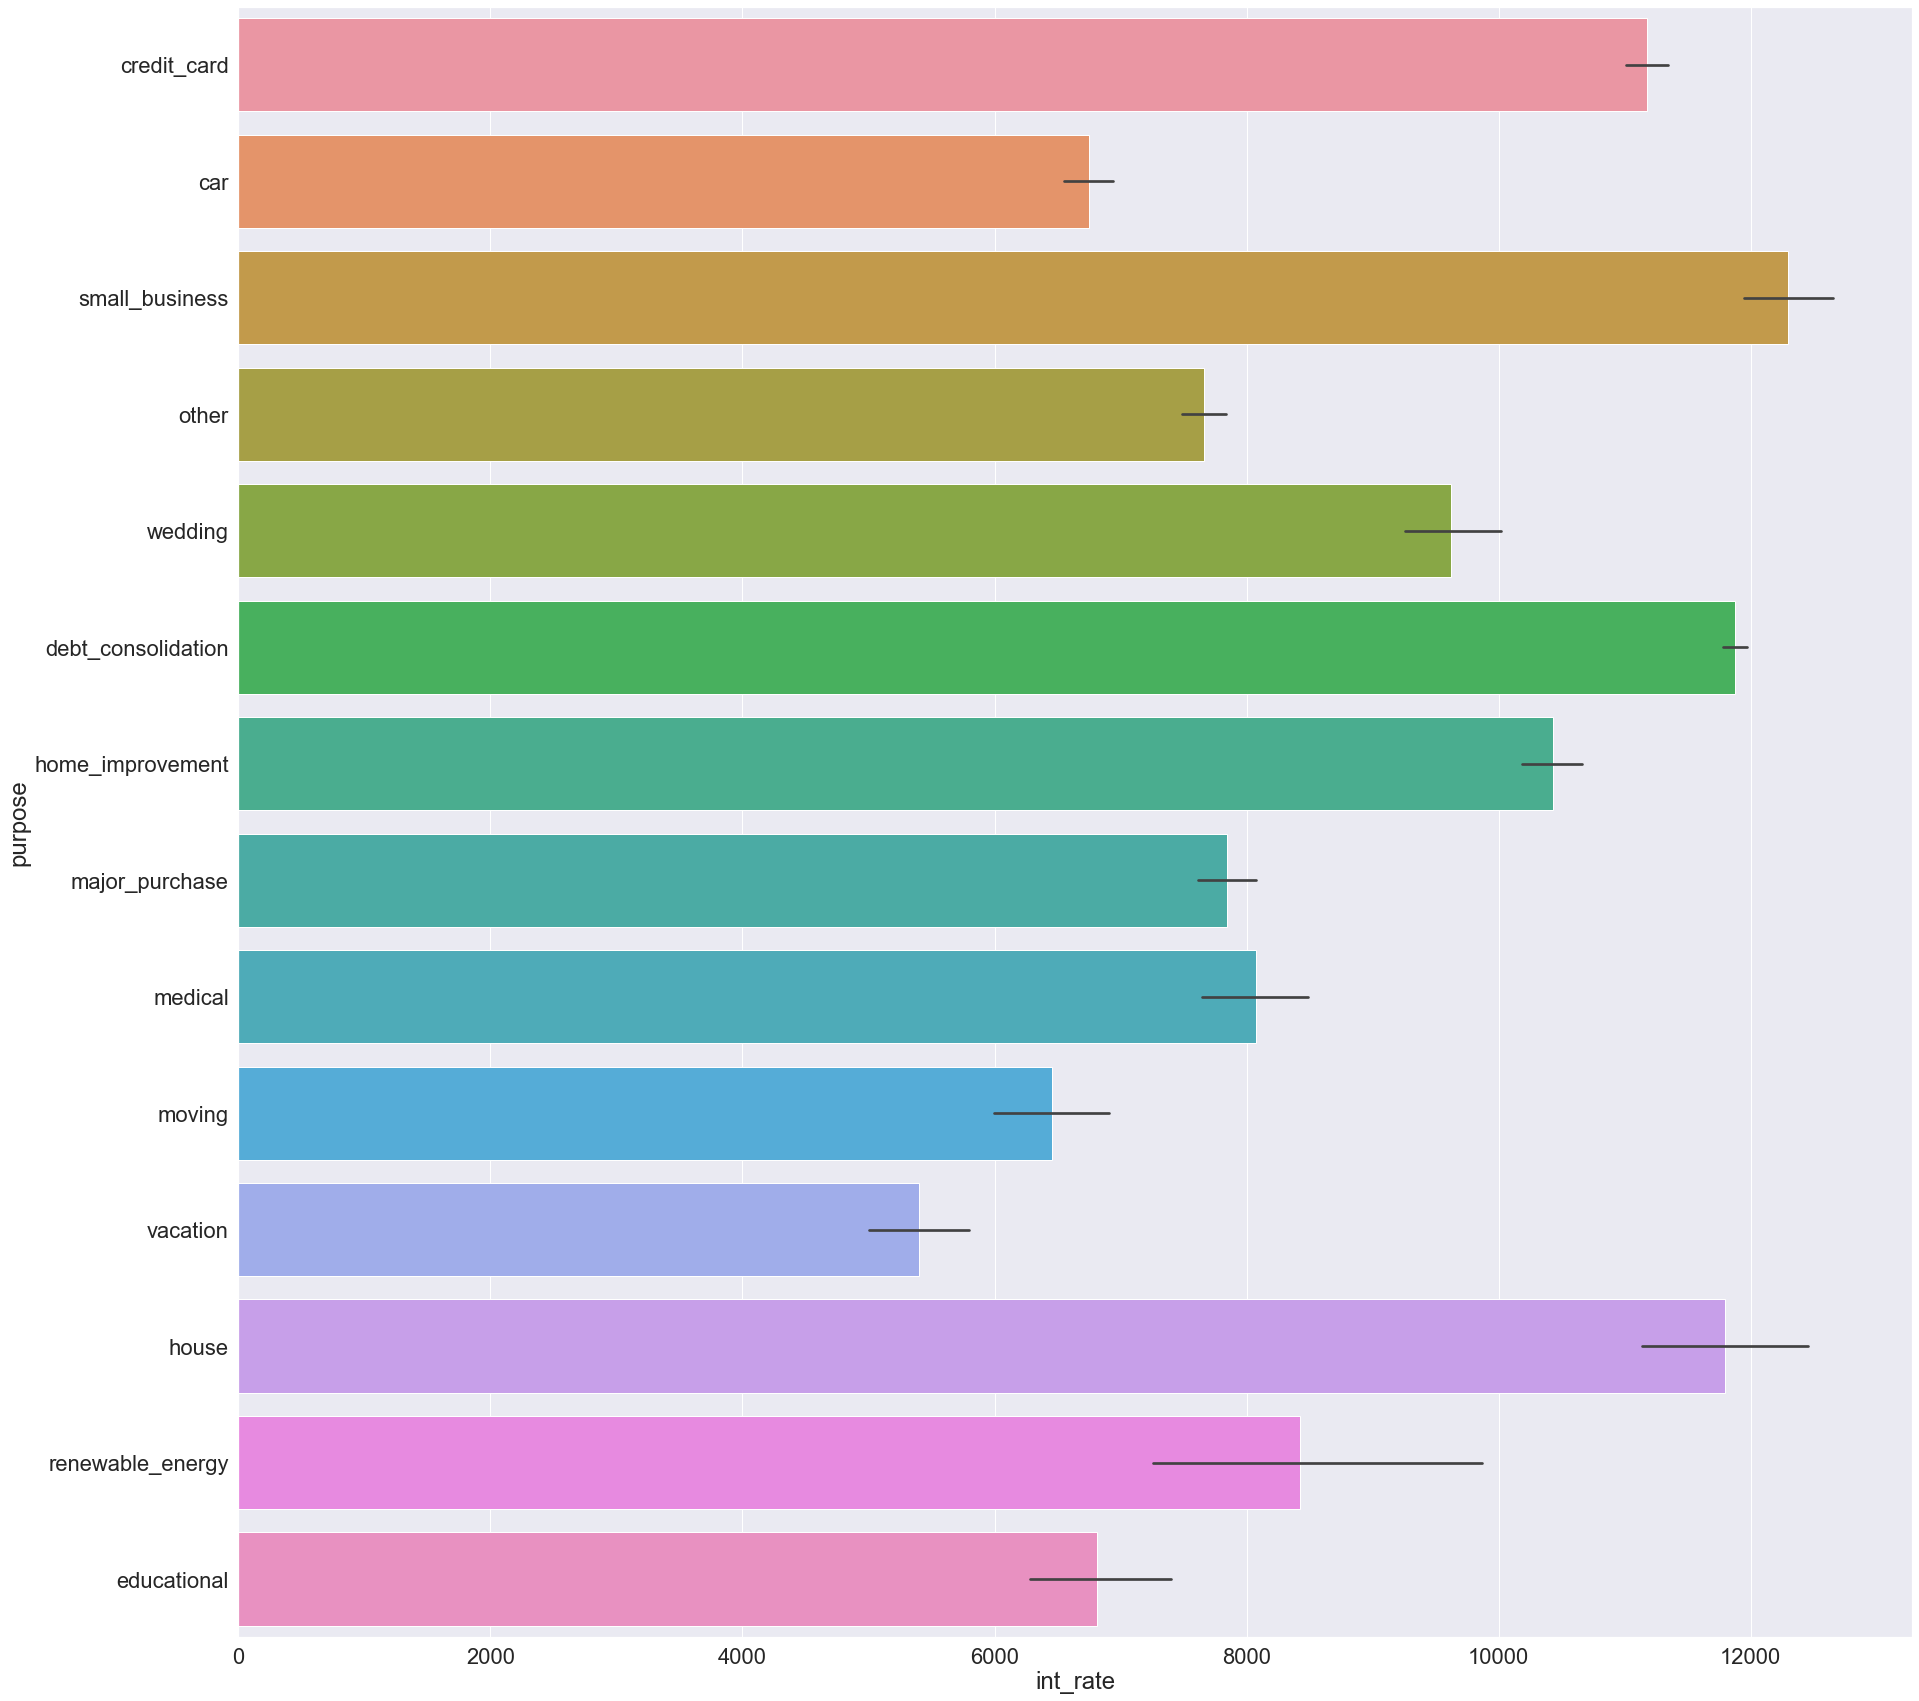

In [229]:
##Plotted a graph between 'purpose' and 'int_rate'##
plt.figure(figsize=(30,30))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['int_rate'], y=updateddf['purpose'], data=updateddf['purpose'] );
#From the analysis -
#small business has higher interest rate


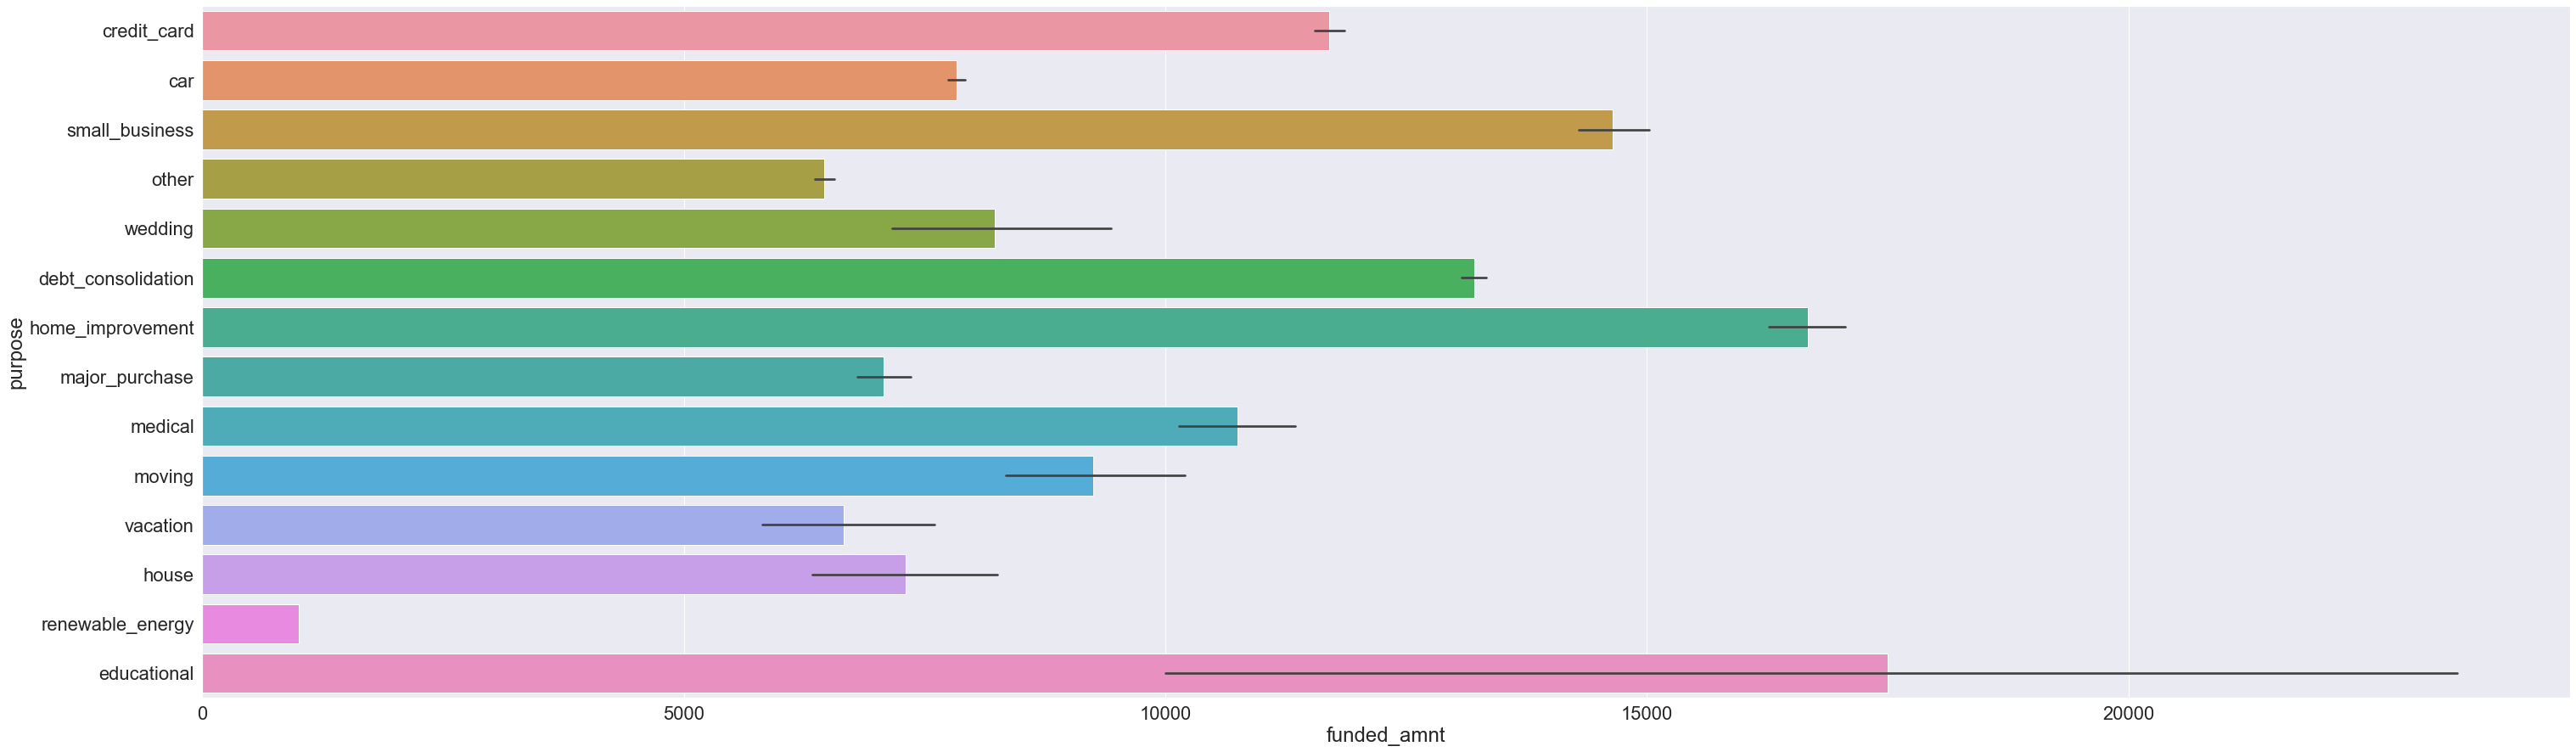

In [260]:
##Plotted a graph between 'purpose' and 'funded_amnt'##
plt.figure(figsize=(50,15))
sns.set(font_scale = 2)
sns.barplot(y=updateddf['purpose'], x=updateddf['funded_amnt'], data=updateddf['funded_amnt'] );
#From the analysis -
#education has higher funded amount


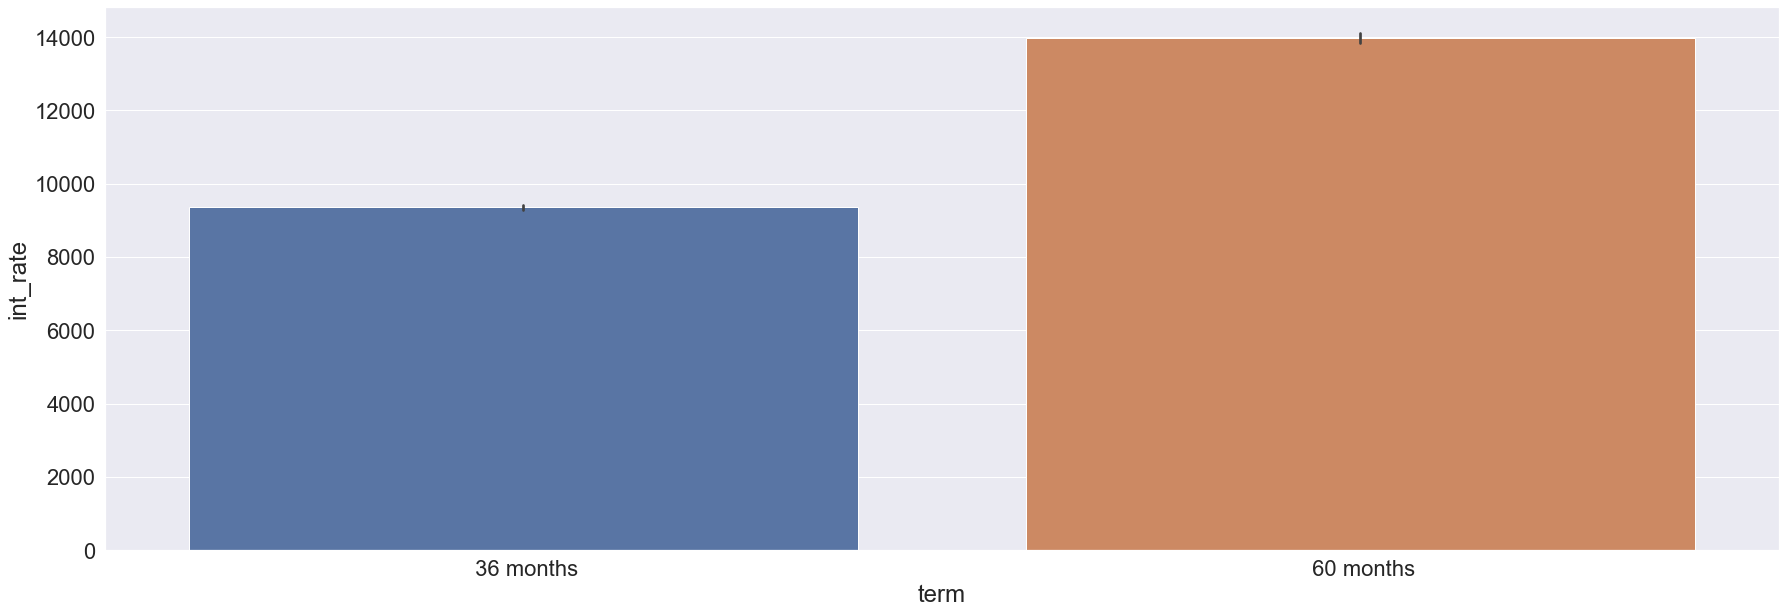

In [231]:
##Plotted a graph between 'term' and 'int_rate'##
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['term'], y=updateddf['int_rate'], data=updateddf['int_rate'] );
#From the analysis -
#60 months have high interest rate


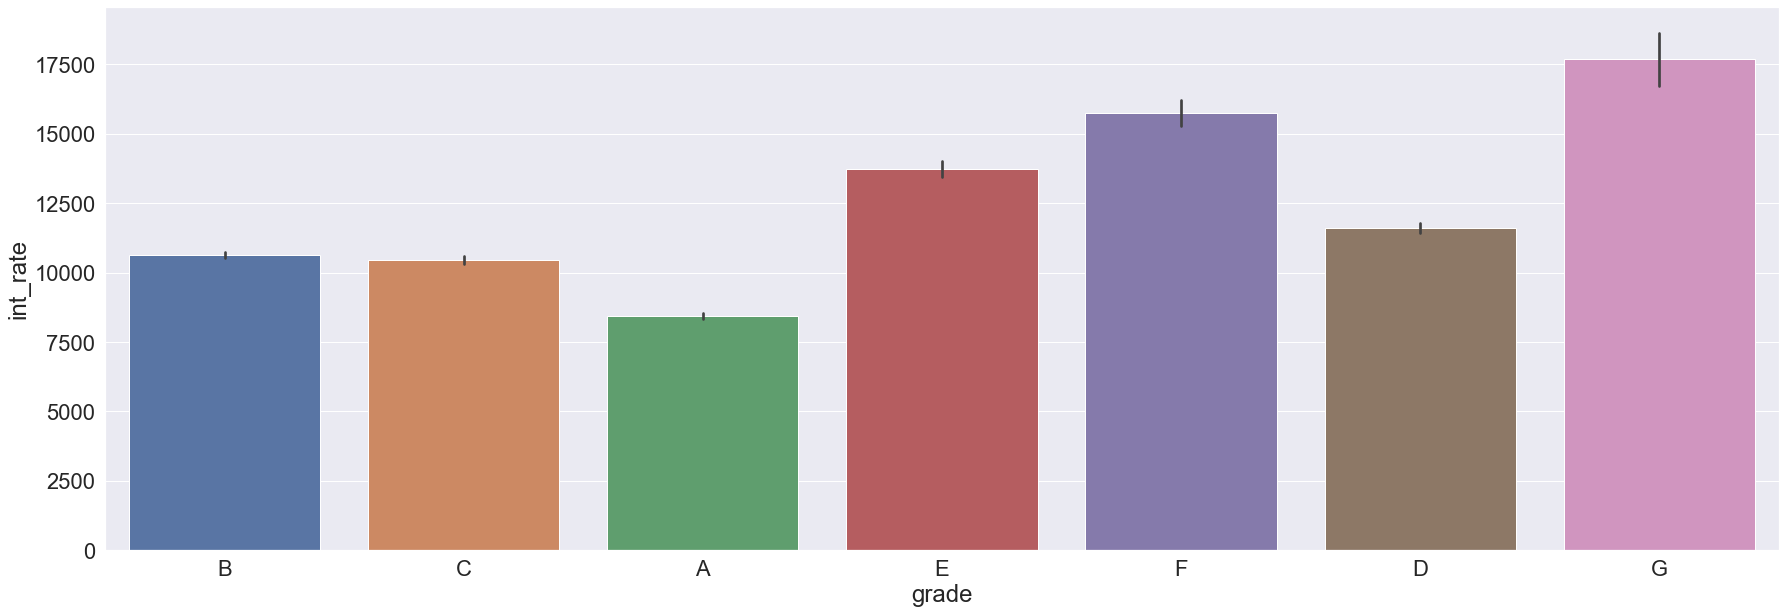

In [232]:
##Plotted a graph between 'grade' and 'int_rate'##
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['grade'], y=updateddf['int_rate'], data=updateddf['int_rate'] );
#From the analysis -
#g grade have high interest rate


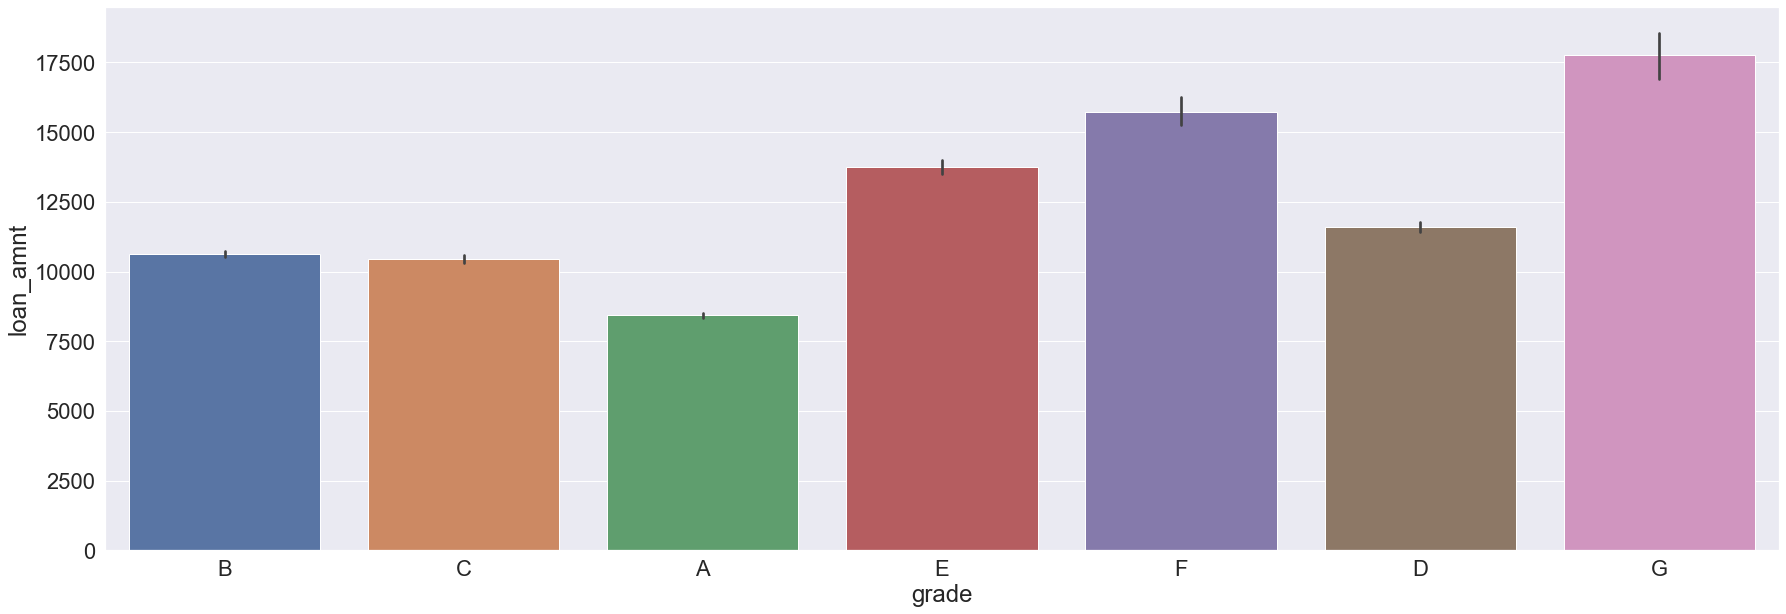

In [233]:
##Plotted a graph between 'grade' and 'loan_amnt'##
plt.figure(figsize=(30,10))
sns.set(font_scale = 2)
sns.barplot(x=updateddf['grade'], y=updateddf['loan_amnt'], data=updateddf['loan_amnt'] );
#From the analysis -
#g grade have high loan amount


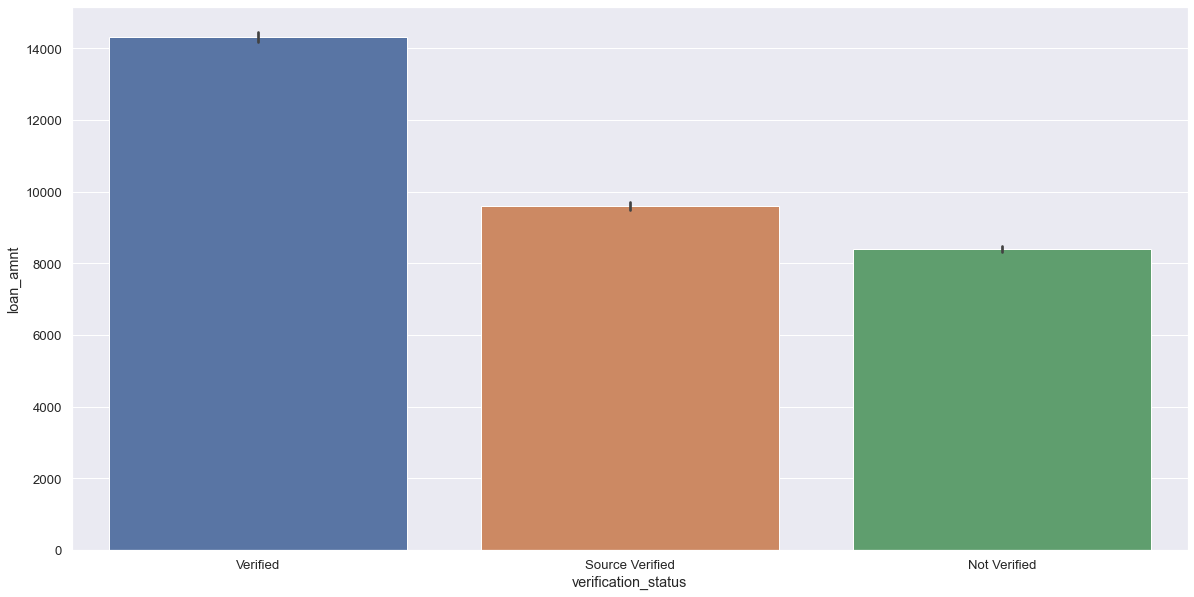

In [267]:
##Plotted a graph between 'verification_status' and 'loan_amnt'##
plt.figure(figsize=(20,10))
sns.set(font_scale =1.2)
sns.barplot(x=updateddf['verification_status'], y=updateddf['loan_amnt'], data=updateddf['loan_amnt'] );
#From the analysis -
#for higher loan_amount it is verified


## MultiVarate Analysis

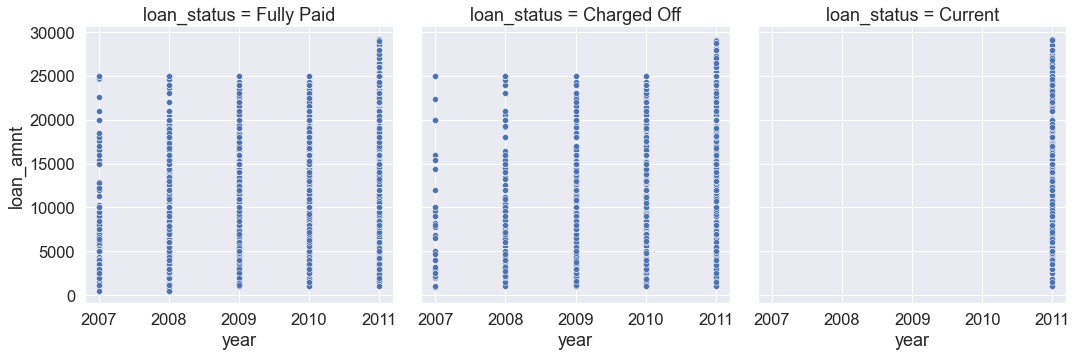

In [274]:
#plotted a graph between year,loan_amount and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['year'], 
    y=updateddf['loan_amnt'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#From analysis with increase in year chargedoff is also increasing and the year 2011  has highest chargedoff.
#with high loan_amount the chargedoff is also higher.

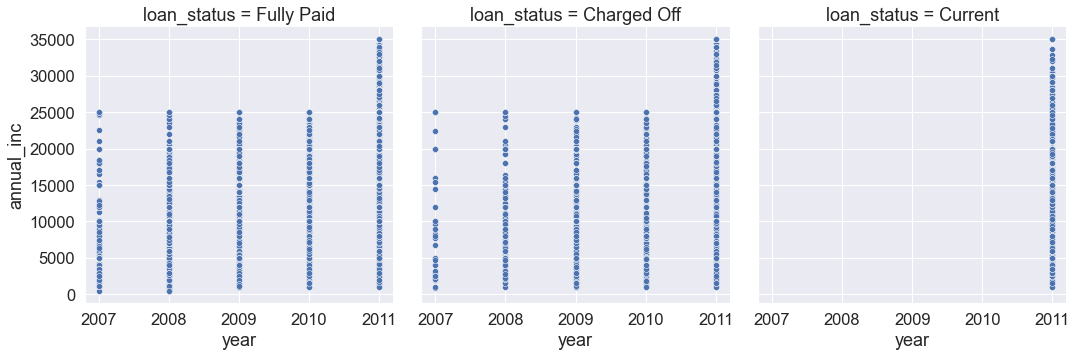

In [275]:
#plotted a graph between year,annual_inc and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['year'], 
    y=updateddf['annual_inc'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#from the analysis even with higher annual_inc the chargeoff is still significant without any reduction.

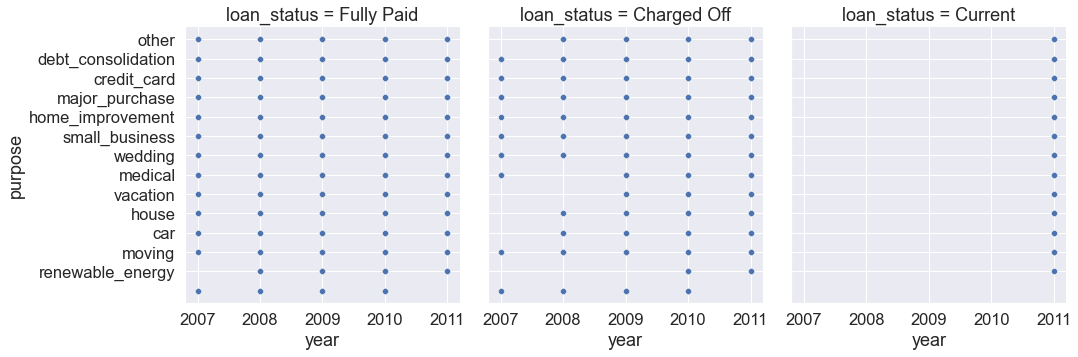

In [276]:
#plotted a graph between year,purpose and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['year'], 
    y=updateddf['purpose'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#from the analysis for debt_consolidation has higher charged_off
#Also chargedoff is present for all purposes in year 2010

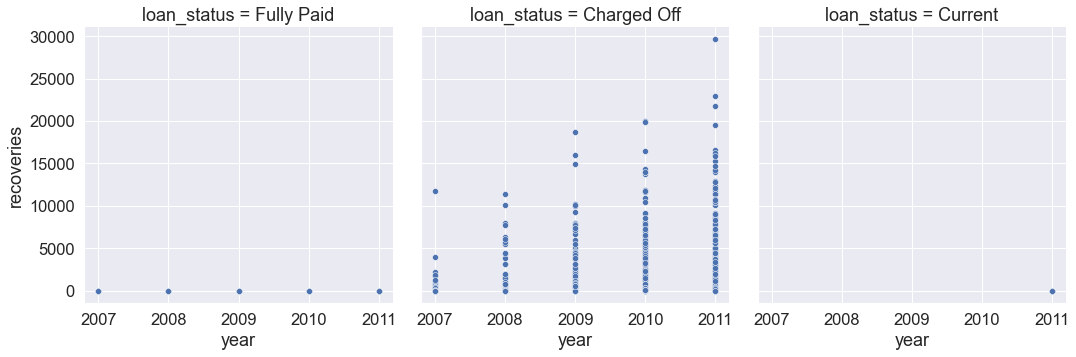

In [277]:
#plotted a graph between year,recoveries and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['year'], 
    y=updateddf['recoveries'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#from the dictionary recoveries meanspost charge off gross recovery
#so from the analysis charged off has high recoveries
#in year 2011 chargedoff has high recoveries

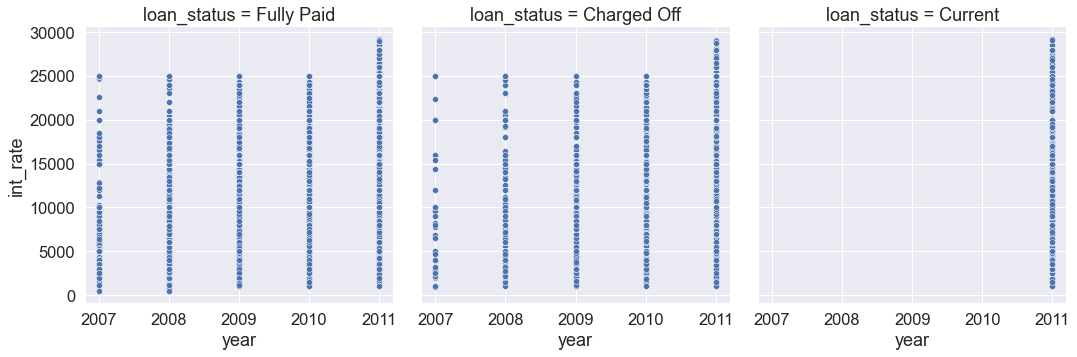

In [278]:
#plotted a graph between year,int_rate and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['year'], 
    y=updateddf['int_rate'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
# from the analysis  with high interest rate  their is high charged off
#in 2011 their is high charged off

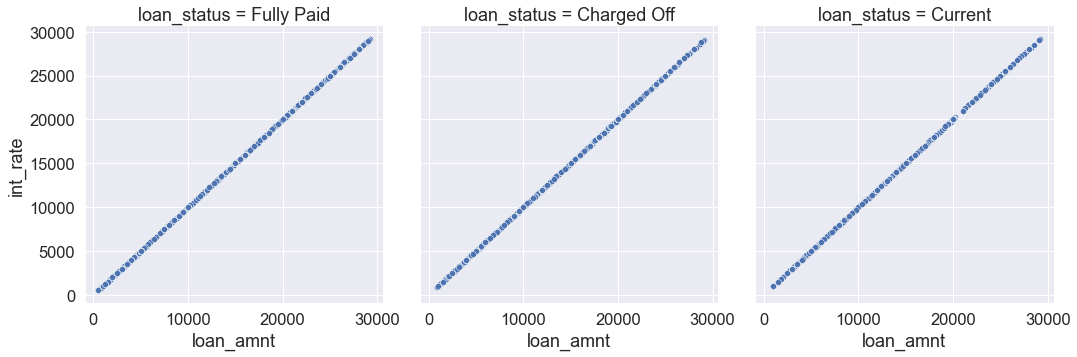

In [279]:
#plotted a graph between loan_amnt,int_rate and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['loan_amnt'], 
    y=updateddf['int_rate'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#with increase on loan_amount ,int_rate is also increasing and charged_off is also increasing

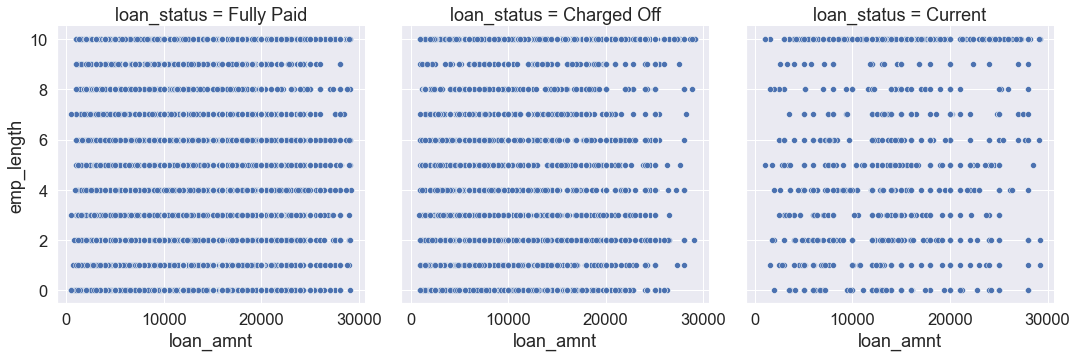

In [280]:
#plotted a graph between loan_amnt,emp_length and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['loan_amnt'], 
    y=updateddf['emp_length'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#with increase on emp_length still the charged_off is also increasing

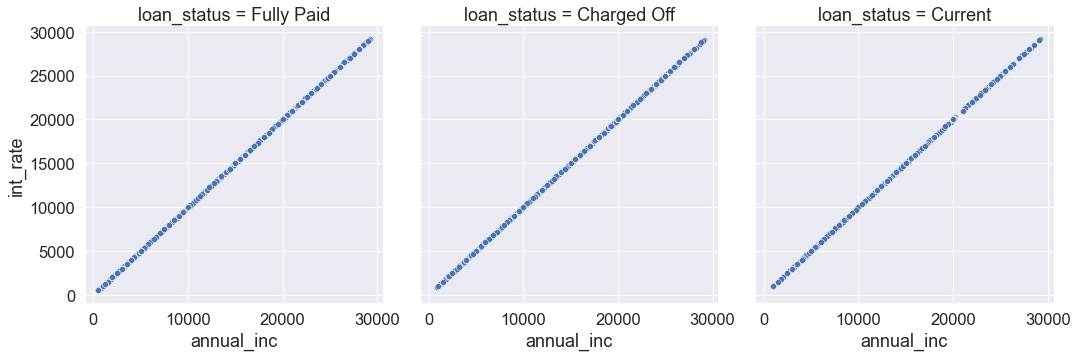

In [281]:
##Plot between int_rate,annual_inc and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['annual_inc'], 
    y=updateddf['int_rate'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#from analysis with increase in annual_inc ,interest rate is increasing and also charged is increasing 

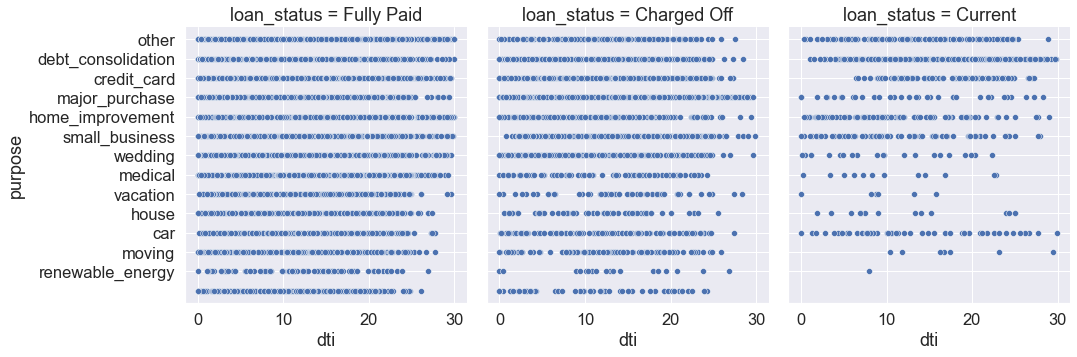

In [282]:
##Plot between dti,purpose and loan_status
sns.set(font_scale = 1.5)
sns.relplot(
    x=updateddf['dti'], 
    y=updateddf['purpose'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['loan_status']);
#from dictionary dti means A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
#from analysis dti is higher for major purchase with higher charged off
#dti for small business is high

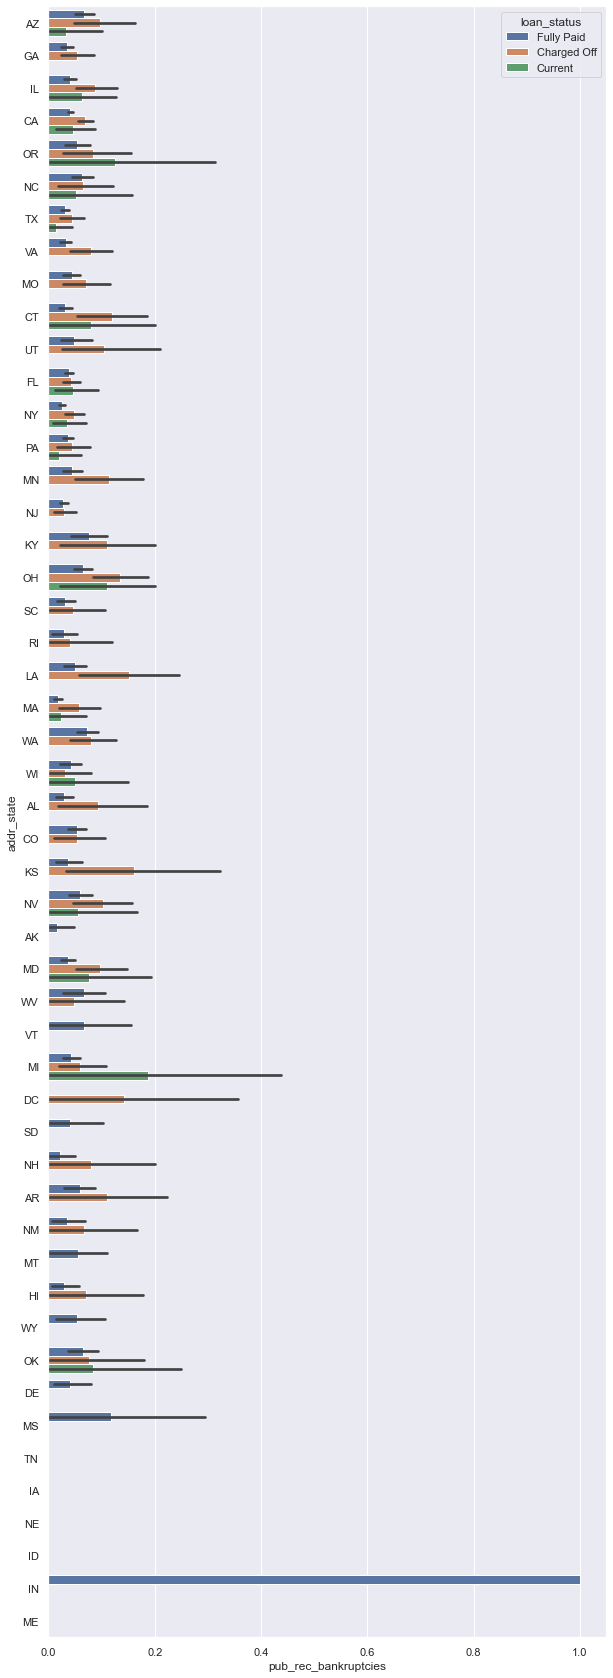

In [272]:
#plot between add_state,pub_rec_bankruptcies,loan_Status
plt.figure(figsize=(10,30))
sns.set(font_scale = 1)
sns.barplot(y=updateddf['addr_state'], x=updateddf['pub_rec_bankruptcies'], data = updateddf, hue =updateddf['loan_status']);
#from analysis ks has higher bankruptcies

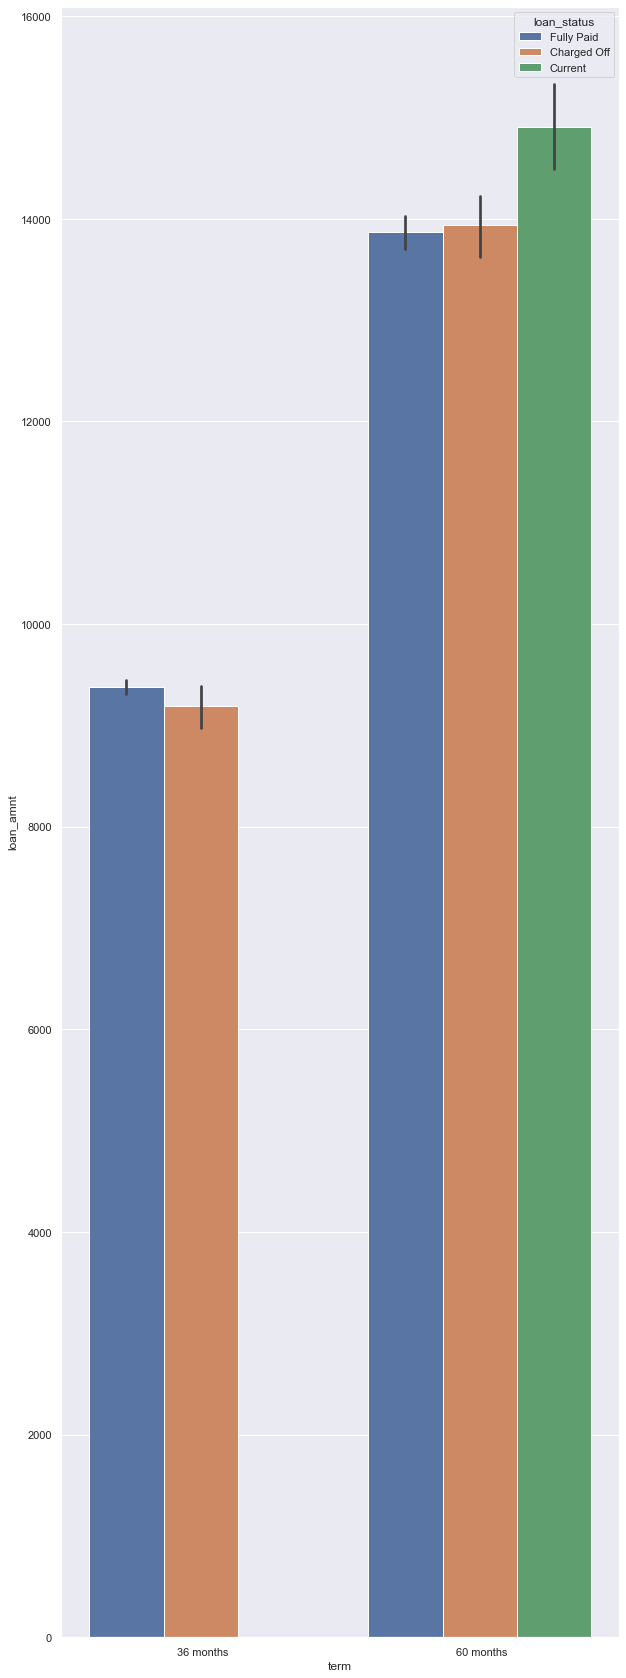

In [271]:
#plot between term,loan_amnt,loan_Status
plt.figure(figsize=(10,30))
sns.set(font_scale = 1)
sns.barplot(x=updateddf['term'], y=updateddf['loan_amnt'], data = updateddf, hue =updateddf['loan_status']);
#from analysis higher the term higher the chargedoff

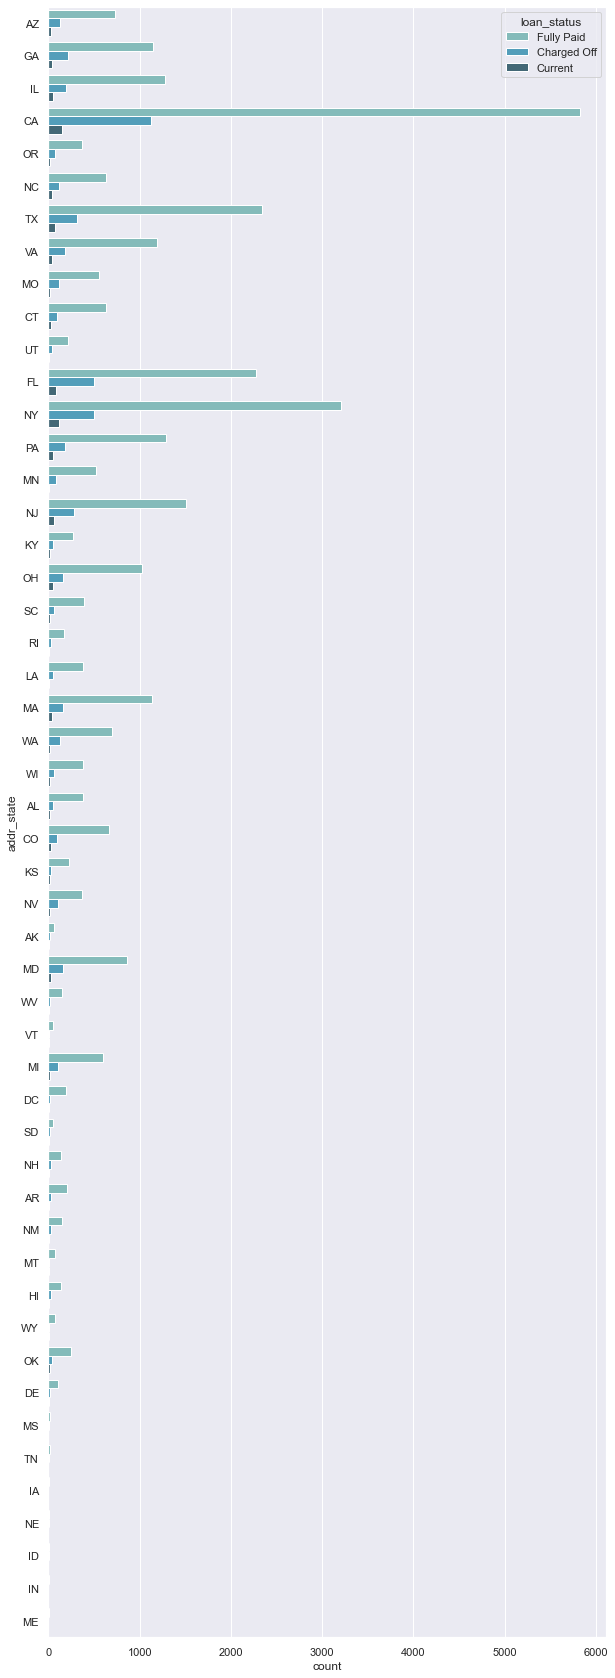

In [270]:
#plot between add_state and loan_Status
plt.figure(figsize=(10,30))
sns.set(font_scale = 1)

sns.countplot(y=updateddf['addr_state'],data=updateddf,hue=updateddf['loan_status'],palette='GnBu_d');
#from analysis CA has higher chargedoff

In [247]:
updateddf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'recoveries', 'application_type',
       'pub_rec_bankruptcies', 'month', 'year', 'annual_incomes', 'dti_cats',
       'ChargedoffProportion', 'FullyPaidProportion', 'loan_status_num',
       'interestcat'],
      dtype='object')

<Figure size 7200x5760 with 0 Axes>

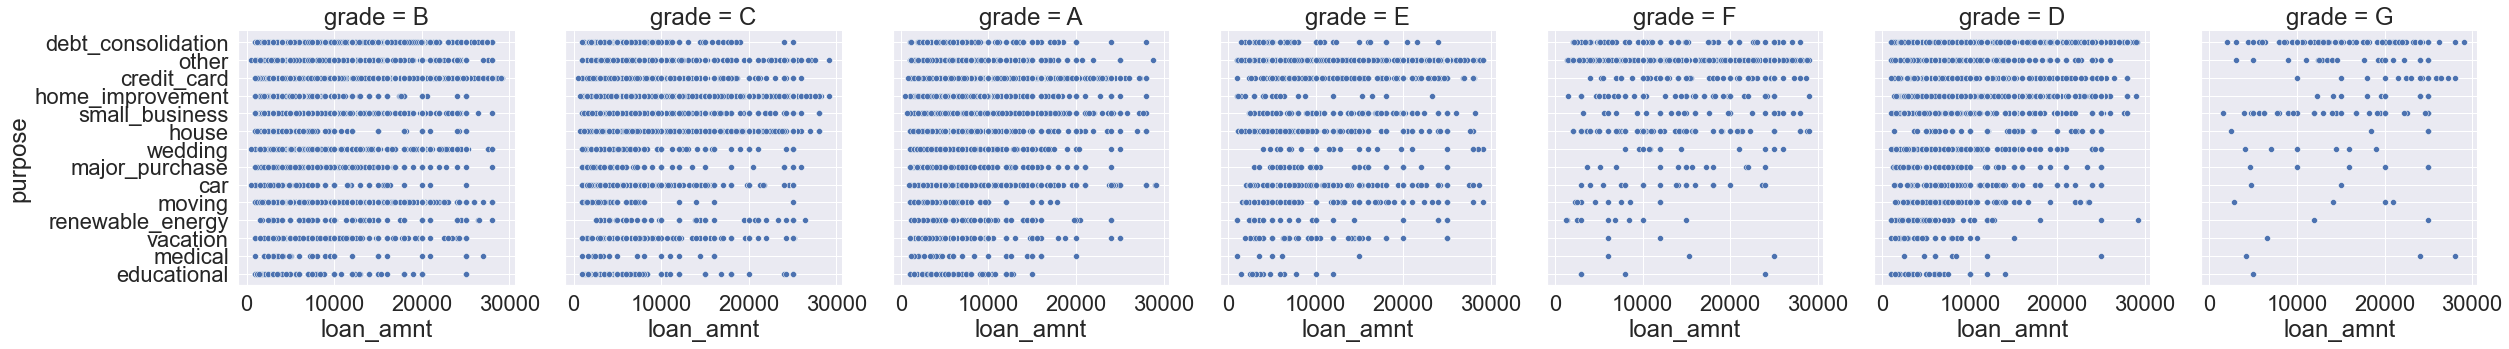

In [263]:
#plotted graph between loan_Amt,purpose,grade
plt.figure(figsize=(100,80));
sns.relplot(
    x=updateddf['loan_amnt'], 
    y=updateddf['purpose'], 
    data=updateddf, 
    kind='scatter', 
    col=updateddf['grade']);
#from the analysis
#for high interest rate it doesnot depend on grade and also purpose
#Based on purpose loan amount is allocated.

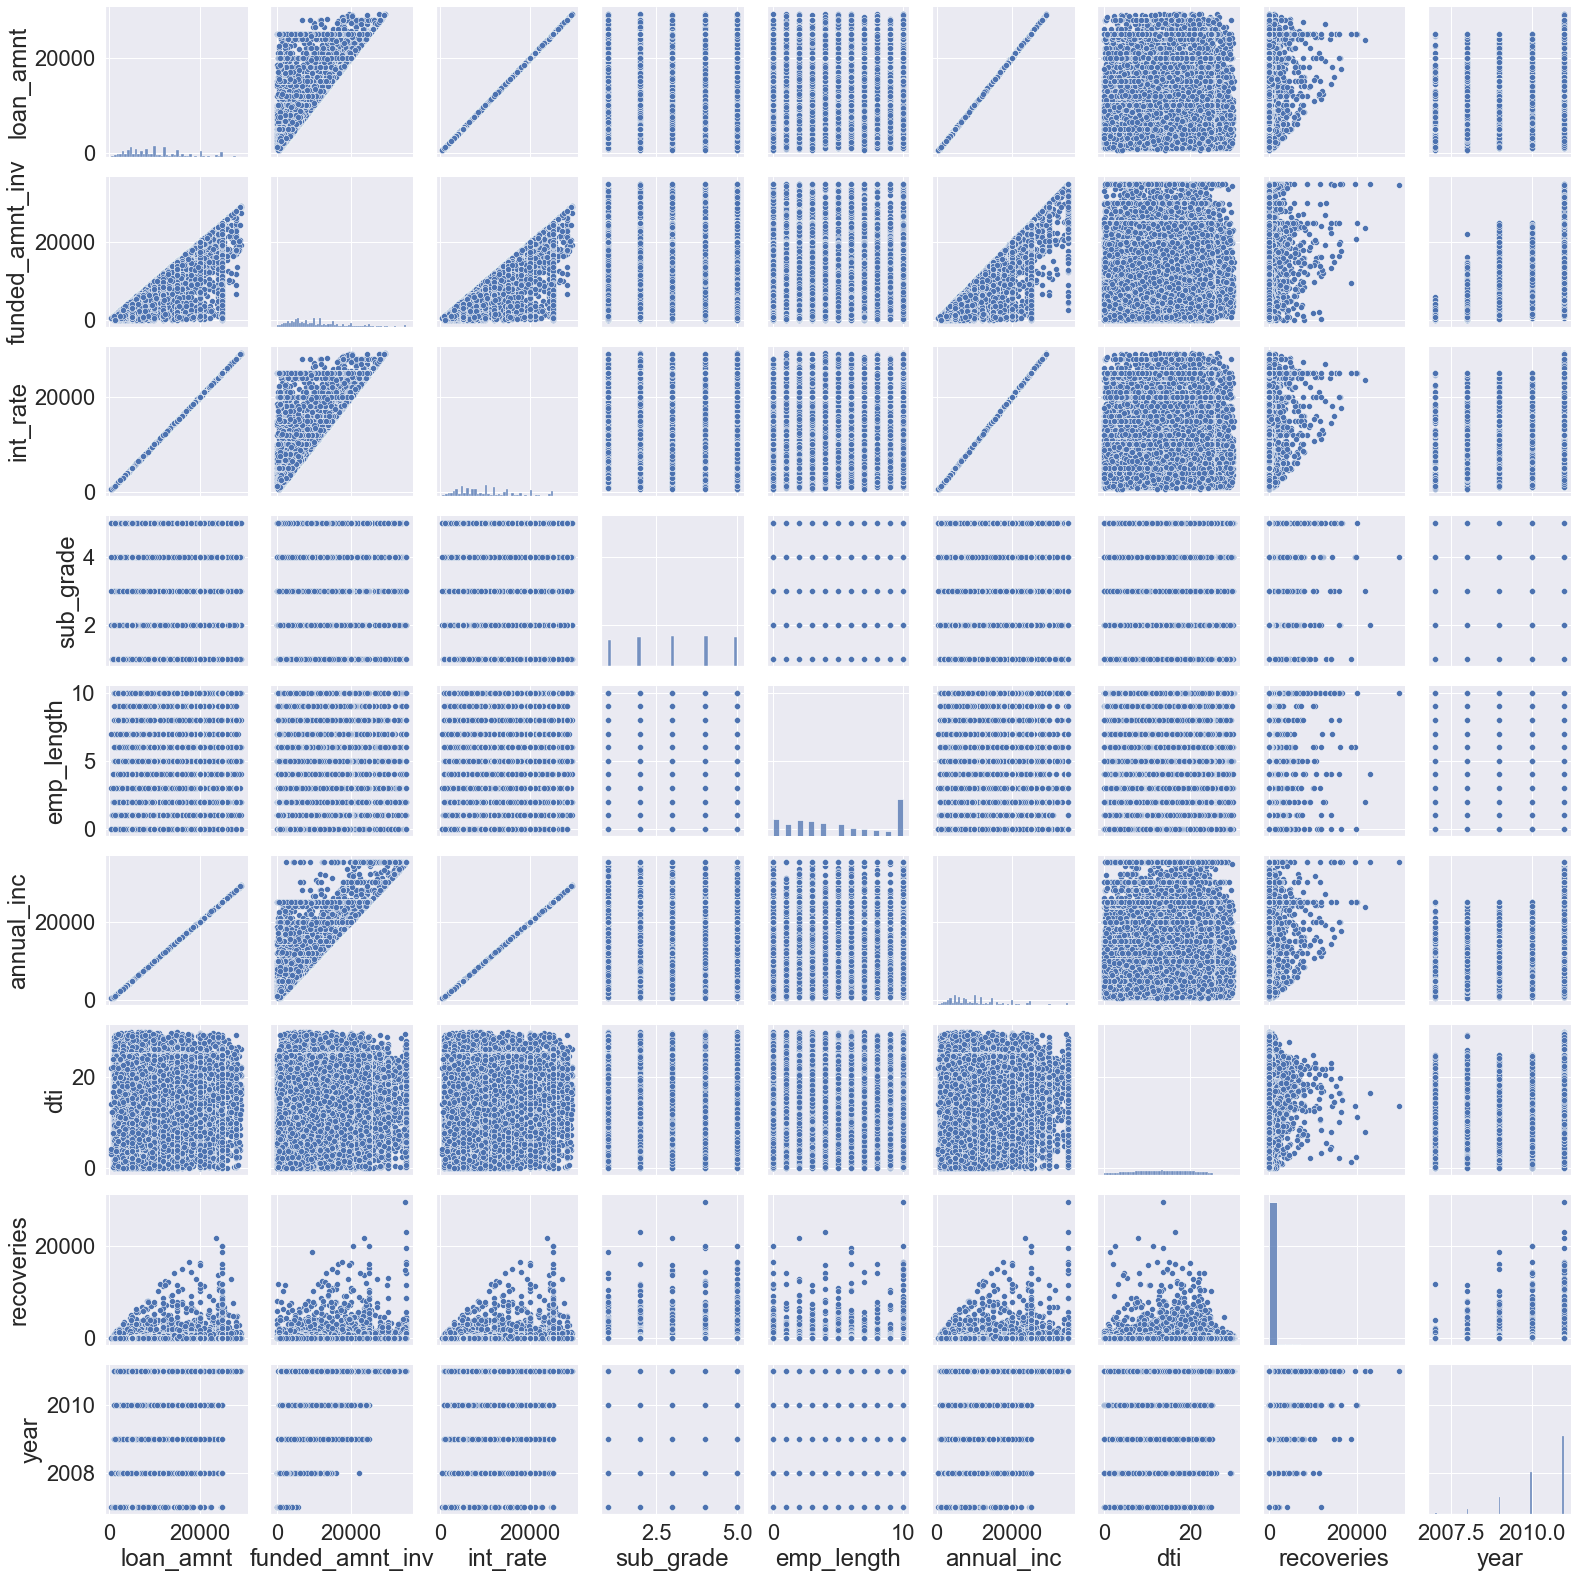

In [249]:
#Overall general ploat
finalDataFrame=updateddf[['loan_amnt','funded_amnt_inv','int_rate','sub_grade','emp_length','annual_inc','dti','recoveries','year']].copy()
sns.pairplot(finalDataFrame);
# from analysis with increase in year ,recoveries are also increasing,emp_length , int_rate increases,loan_amount also increasing.

## Final Analysis

In [250]:
#Checking the correlation
desp = updateddf[['funded_amnt_inv', 'funded_amnt','loan_status_num']].copy()
desp.corr();


<module 'seaborn' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

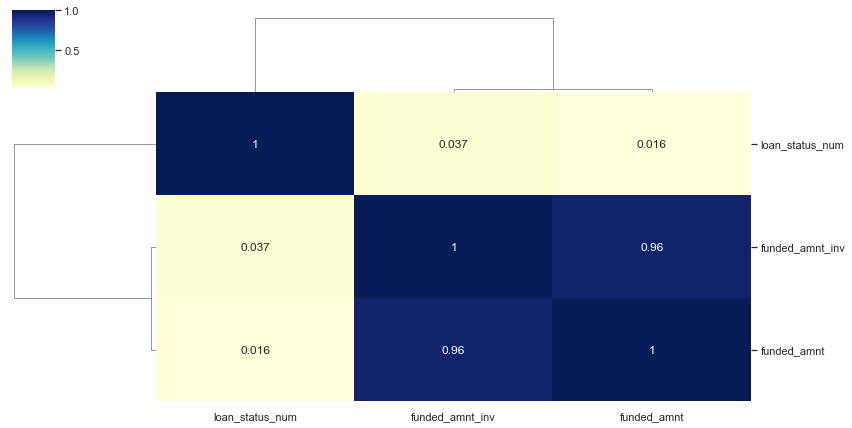

In [269]:

sns.set_style("whitegrid");
sns.set(font_scale = 1)
sns.clustermap(data=desp.corr(),annot=True, cmap='YlGnBu', figsize=(12,6));
sns

#From the analysis
#Their is a gap between fundedamount and loan_status and their are various factors influencing it

<module 'seaborn' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

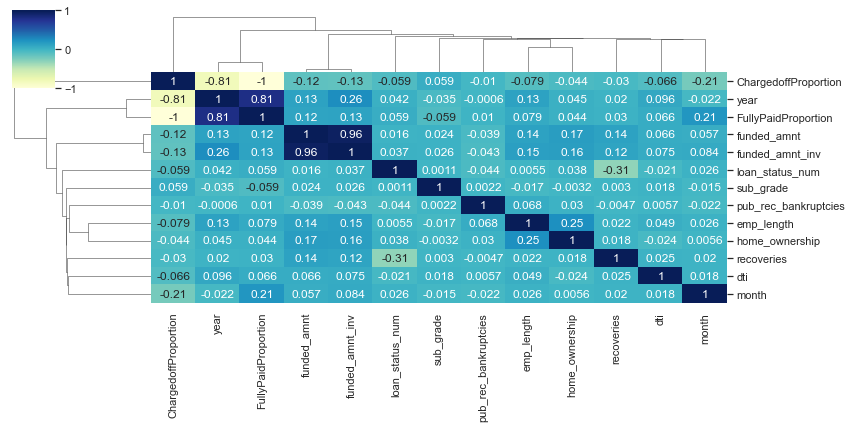

In [268]:
#Correlation-2
sns.set_style("whitegrid")
sns.set(font_scale = 1)
sns.clustermap(data=updateddf.corr(),annot=True, cmap='YlGnBu', figsize=(12,6));
sns
#analysis
#Their is very less correlation among many parameters except year and fullypaidpropotion

## 5 IMPORTANT DRIVING VARIABLES FOR Default  Off from UNIVARATE ,BIVARATE AND MULTIVARATE ARE
1. annual_inc
2.int_rate
3.term
4.verification_status
5.purpose

## Reasons for the Default  are:
1. loans with longer term are more suspectable to  charged off.
2. clients with high inc_amnt has high interest rate irrespective of loan amount so more suspectable to chargeoff.
3. Grade g has high loan_amount and high interest rate so more suspectable to chargeoff.
4. Higher loans are verified but smaller loans are not verified so more suspectable to high chargeoff.
5. State CA has high chargeoff.
6. With higher income high loan amount so longer the term can be a reason for chargeoff.
7. With higher term their is a possibility of bankruptcies which can cause the chargeoff.
8. Most charged off loans were taken to pay debts
